In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/15/2020       Albany             33                             581   
1  04/15/2020     Allegany              0                              28   
2  04/15/2020        Bronx           1279                           25932   
3  04/15/2020       Broome             14                             167   
4  04/15/2020  Cattaraugus              0                              32   
5  04/15/2020       Cayuga              0                              36   
6  04/15/2020   Chautauqua              0                              24   
7  04/15/2020      Chemung              1                              70   
8  04/15/2020     Chenango              2                              73   
9  04/15/2020      Clinton              1                              46   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              301                                  6163  
1                                8                                   312  
2                             2939                                 51053  
3                               74                                  1185  
4                               14                                   408  
5                               10                                   587  
6                               29                                   553  
7                               18                                   843  
8                               21                                   435  
9                               17                                   468

In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 37,918                           | 70,663                                 |
|  1 | Kings       | 33,521                           | 66,072                                 |
|  2 | Nassau      | 27,772                           | 62,276                                 |
|  3 | Bronx       | 25,932                           | 51,053                                 |
|  4 | Suffolk     | 24,182                           | 57,047                                 |
|  5 | Westchester | 21,828                           | 65,268                                 |
|  6 | New York    | 17,091                           | 42,050                                 |
|  7 | Rockland    | 8,752                            | 20,114                                 |
|  8 | Richmond    | 8,684    

In [6]:
covid_19_nys_data.shape

(2790, 6)

# Saving source .csv data

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/15/2020.


In [8]:
covid_19_nys_data.to_csv('data/covid_19_nys_data', index=False)

In [9]:
current_date = covid_19_nys_data.sort_values(by='Test Date', ascending=False)['Test Date'].iloc[0]

In [10]:
current_date

'04/15/2020'

# Begin Analysis

In [11]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/15/2020       Albany             33                             581   
1  04/15/2020     Allegany              0                              28   
2  04/15/2020        Bronx           1279                           25932   
3  04/15/2020       Broome             14                             167   
4  04/15/2020  Cattaraugus              0                              32   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              301                                  6163  
1                                8                                   312  
2                             2939                                 51053  
3                               74                                  1185  
4                               14                                   408

In [12]:
covid_19_nys_data.tail()

Test Date       County  New Positives  Cumulative Number of Positives  \
2785  03/02/2020   Washington              0                               0   
2786  03/02/2020        Wayne              0                               0   
2787  03/02/2020  Westchester              1                               1   
2788  03/02/2020      Wyoming              0                               0   
2789  03/02/2020        Yates              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
2785                                0                                     0  
2786                                0                                     0  
2787                                1                                     1  
2788                                0                                     0  
2789                                0                                     0

In [13]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [14]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [15]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             2790 non-null   object
 1   County                                2790 non-null   object
 2   New Positives                         2790 non-null   int64 
 3   Cumulative Number of Positives        2790 non-null   int64 
 4   Total Number of Tests Performed       2790 non-null   int64 
 5   Cumulative Number of Tests Performed  2790 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.9+ KB


In [16]:
covid_19_nys_data.describe()

New Positives  Cumulative Number of Positives  \
count    2790.000000                     2790.000000   
mean       79.671685                     1047.898208   
std       267.151591                     4049.660845   
min         0.000000                        0.000000   
25%         0.000000                        0.000000   
50%         1.000000                        7.000000   
75%         6.000000                       61.000000   
max      2663.000000                    37918.000000   

       Total Number of Tests Performed  Cumulative Number of Tests Performed  
count                      2790.000000                           2790.000000  
mean                        197.340143                           2712.202867  
std                         567.226809                           8833.804083  
min                           0.000000                              0.000000  
25%                           1.000000                              5.000000  
50%                          12.000000                            127.000000  
75%                          54.000000                            670.500000  
max                        5951.000000                          70663.000000

In [17]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [18]:
covid_19_nys_data.isnull().sum().sum()

0

In [19]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/15/2020       Albany             33                             581   
1  04/15/2020     Allegany              0                              28   
2  04/15/2020        Bronx           1279                           25932   
3  04/15/2020       Broome             14                             167   
4  04/15/2020  Cattaraugus              0                              32   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              301                                  6163  
1                                8                                   312  
2                             2939                                 51053  
3                               74                                  1185  
4                               14                                   408

In [20]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [21]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [23]:
epi_curve = covid_19_nys_data.sort_values(by='Test Date')

In [24]:
epi_curve = epi_curve.groupby(by='Test Date')['New Positives'].sum().reset_index()

In [25]:
epi_curve['NewDate'] = epi_curve['Test Date'].dt.strftime("%m-%d")

In [26]:
epi_curve

Test Date  New Positives NewDate
0  2020-03-02              1   03-02
1  2020-03-03              0   03-03
2  2020-03-04              2   03-04
3  2020-03-05             22   03-05
4  2020-03-06             11   03-06
5  2020-03-07             24   03-07
6  2020-03-08             28   03-08
7  2020-03-09             63   03-09
8  2020-03-10             44   03-10
9  2020-03-11             56   03-11
10 2020-03-12            102   03-12
11 2020-03-13            164   03-13
12 2020-03-14            131   03-14
13 2020-03-15            294   03-15
14 2020-03-16            432   03-16
15 2020-03-17           1009   03-17
16 2020-03-18           1769   03-18
17 2020-03-19           2950   03-19
18 2020-03-20           3254   03-20
19 2020-03-21           4812   03-21
20 2020-03-22           5707   03-22
21 2020-03-23           4790   03-23
22 2020-03-24           5145   03-24
23 2020-03-25           6448   03-25
24 2020-03-26           7379   03-26
25 2020-03-27           7681   03-27
26 2020-03-28           7195   03-28
27 2020-03-29           6984   03-29
28 2020-03-30           9298   03-30
29 2020-03-31           7917   03-31
30 2020-04-01           8669   04-01
31 2020-04-02          10482   04-02
32 2020-04-03          10841   04-03
33 2020-04-04           8327   04-04
34 2020-04-05           8658   04-05
35 2020-04-06           8174   04-06
36 2020-04-07          10453   04-07
37 2020-04-08          10621   04-08
38 2020-04-09          10575   04-09
39 2020-04-10           9946   04-10
40 2020-04-11           8236   04-11
41 2020-04-12           6337   04-12
42 2020-04-13           7177   04-13
43 2020-04-14          11571   04-14
44 2020-04-15           8505   04-15

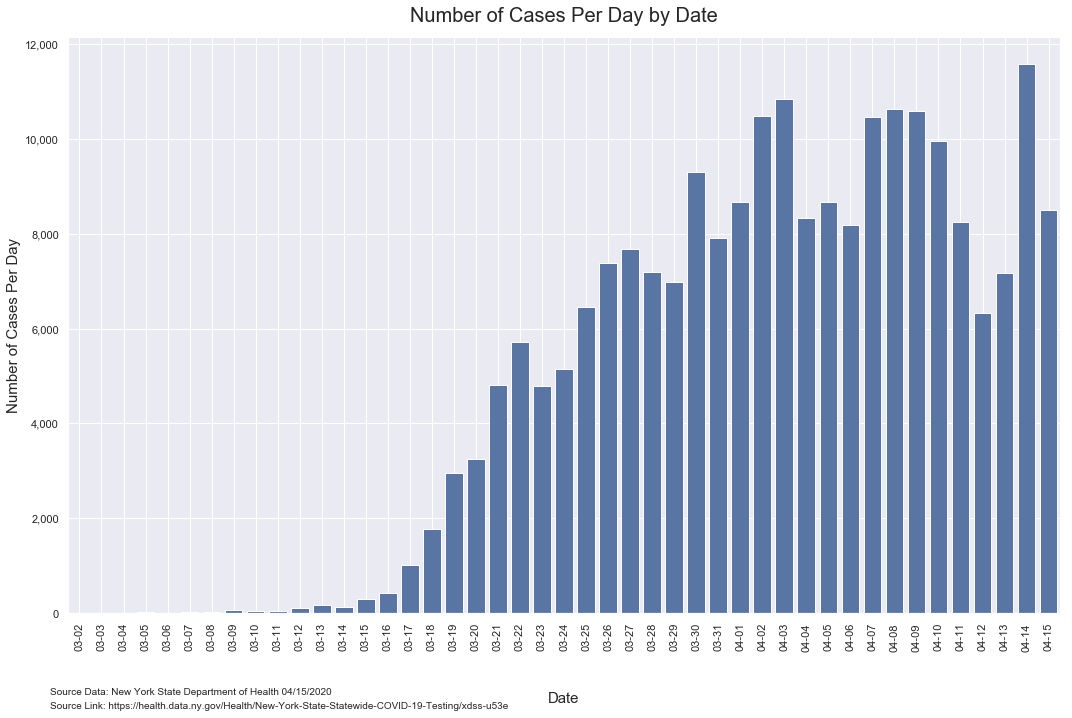

In [32]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [28]:
epi_curve['3_day_rolling_average'] = epi_curve['New Positives'].rolling(3, win_type='triang').mean()

In [29]:
epi_curve

Test Date  New Positives NewDate  3_day_rolling_average
0  2020-03-02              1   03-02                    NaN
1  2020-03-03              0   03-03                    NaN
2  2020-03-04              2   03-04                   0.75
3  2020-03-05             22   03-05                   6.50
4  2020-03-06             11   03-06                  14.25
5  2020-03-07             24   03-07                  17.00
6  2020-03-08             28   03-08                  21.75
7  2020-03-09             63   03-09                  35.75
8  2020-03-10             44   03-10                  49.50
9  2020-03-11             56   03-11                  51.75
10 2020-03-12            102   03-12                  64.50
11 2020-03-13            164   03-13                 106.00
12 2020-03-14            131   03-14                 140.25
13 2020-03-15            294   03-15                 180.00
14 2020-03-16            432   03-16                 287.75
15 2020-03-17           1009   03-17                 541.75
16 2020-03-18           1769   03-18                1054.75
17 2020-03-19           2950   03-19                1874.25
18 2020-03-20           3254   03-20                2730.75
19 2020-03-21           4812   03-21                3567.50
20 2020-03-22           5707   03-22                4646.25
21 2020-03-23           4790   03-23                5254.00
22 2020-03-24           5145   03-24                5108.00
23 2020-03-25           6448   03-25                5382.00
24 2020-03-26           7379   03-26                6355.00
25 2020-03-27           7681   03-27                7221.75
26 2020-03-28           7195   03-28                7484.00
27 2020-03-29           6984   03-29                7263.75
28 2020-03-30           9298   03-30                7615.25
29 2020-03-31           7917   03-31                8374.25
30 2020-04-01           8669   04-01                8450.25
31 2020-04-02          10482   04-02                8934.25
32 2020-04-03          10841   04-03               10118.50
33 2020-04-04           8327   04-04               10122.75
34 2020-04-05           8658   04-05                9038.25
35 2020-04-06           8174   04-06                8454.25
36 2020-04-07          10453   04-07                8864.75
37 2020-04-08          10621   04-08                9925.25
38 2020-04-09          10575   04-09               10567.50
39 2020-04-10           9946   04-10               10429.25
40 2020-04-11           8236   04-11                9675.75
41 2020-04-12           6337   04-12                8188.75
42 2020-04-13           7177   04-13                7021.75
43 2020-04-14          11571   04-14                8065.50
44 2020-04-15           8505   04-15                9706.00

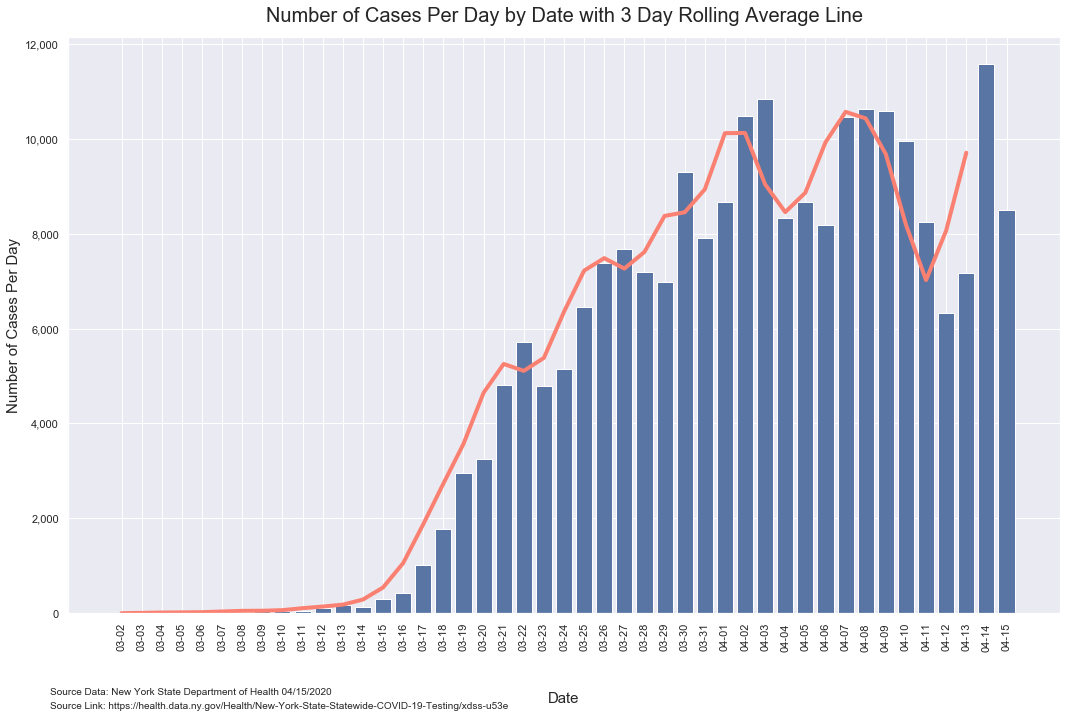

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=epi_curve, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date with 3 Day Rolling Average Line', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve')

In [22]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-15       Albany             33                             581   
1 2020-04-15     Allegany              0                              28   
2 2020-04-15        Bronx           1279                           25932   
3 2020-04-15       Broome             14                             167   
4 2020-04-15  Cattaraugus              0                              32   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              301                                  6163  
1                                8                                   312  
2                             2939                                 51053  
3                               74                                  1185  
4                               14                                   408

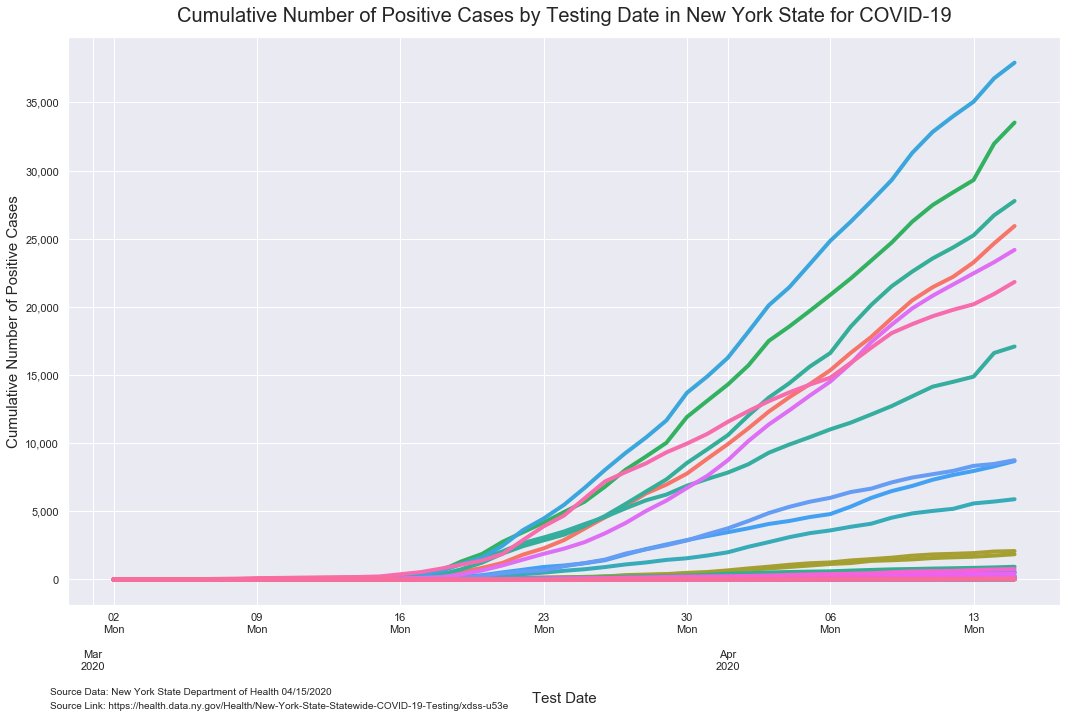

In [23]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

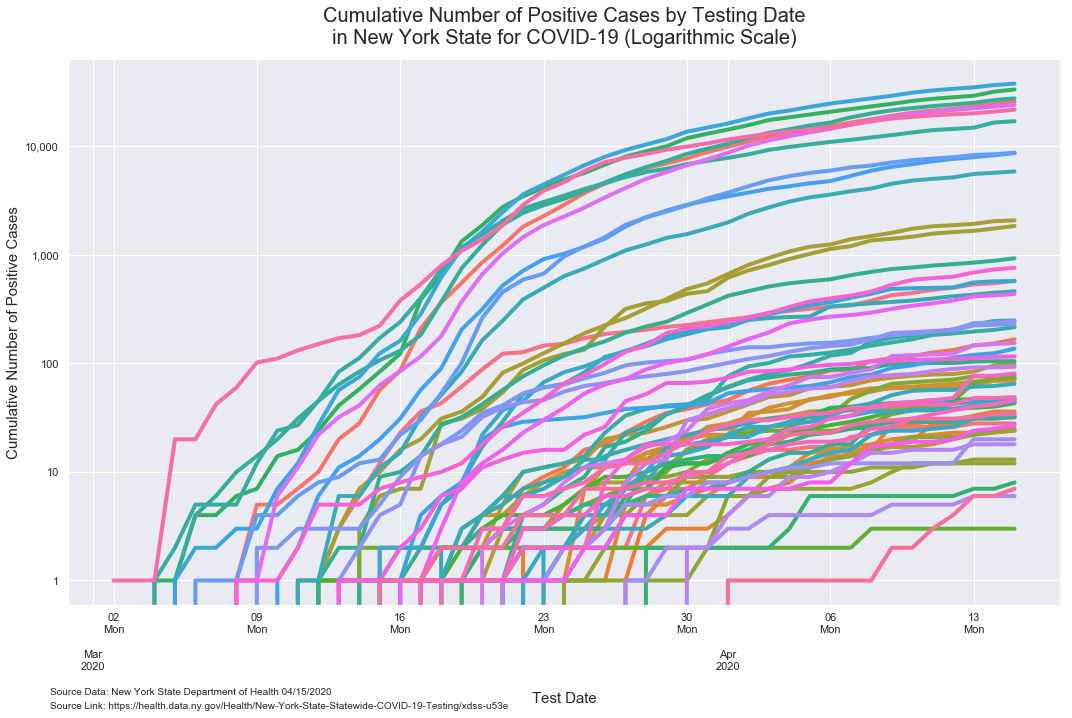

In [24]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [25]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

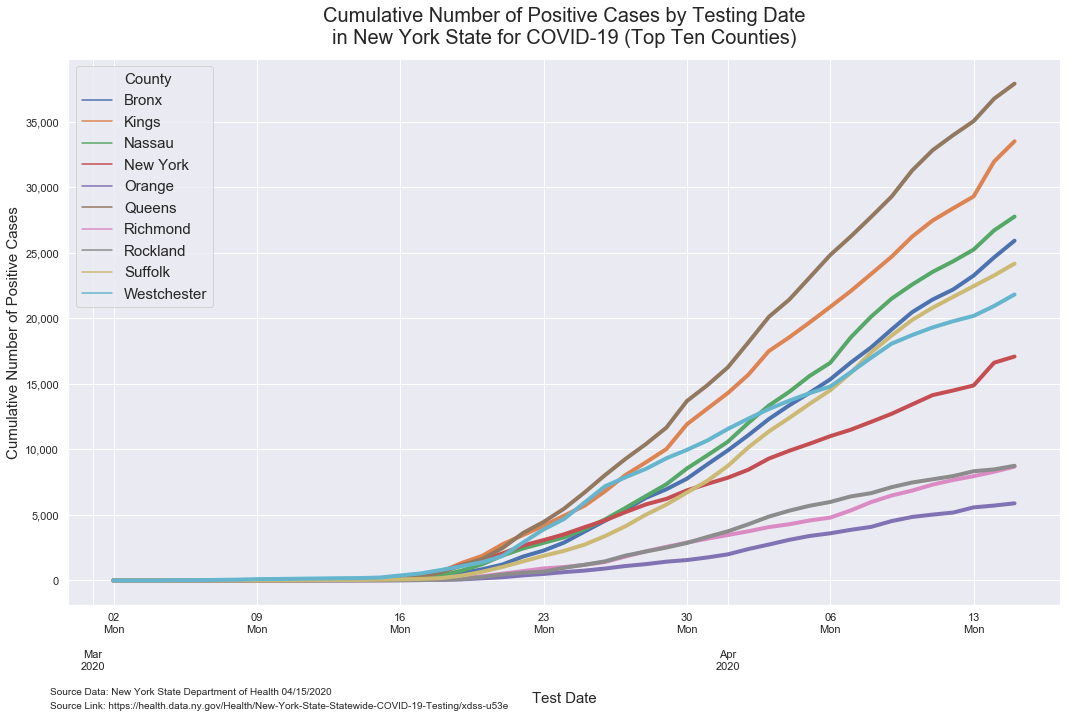

In [26]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

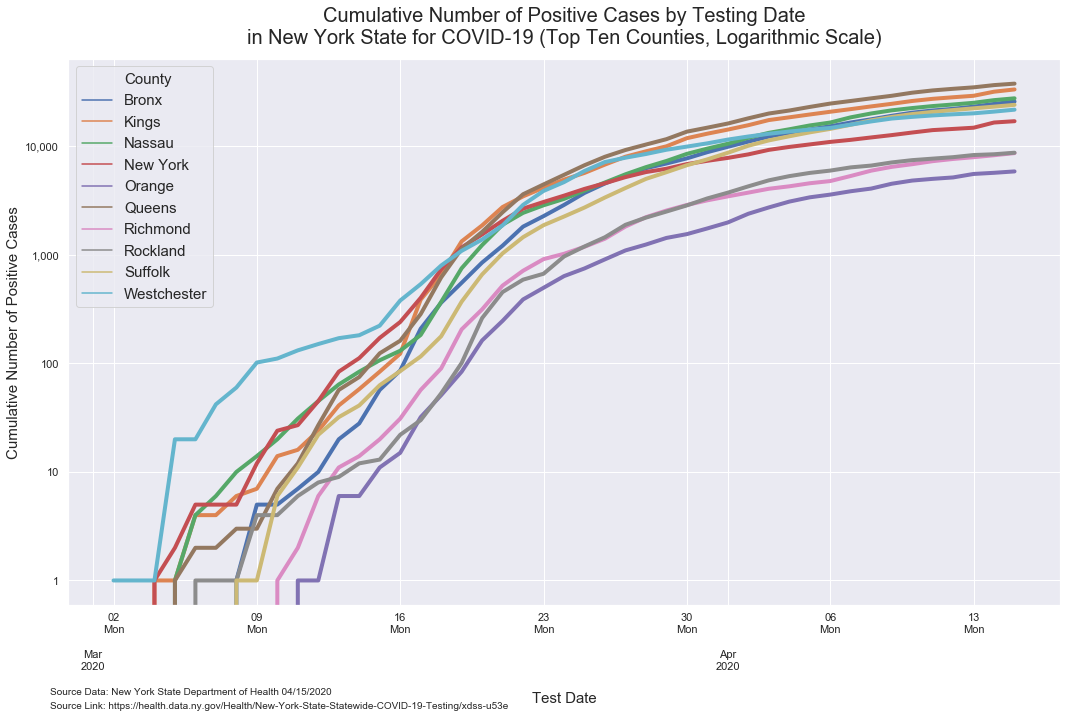

In [27]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [28]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [29]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [30]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [31]:
from_ten_cases

County ten_cases_date
0    Westchester     2020-03-05
1         Nassau     2020-03-08
2       New York     2020-03-09
3          Kings     2020-03-10
4        Suffolk     2020-03-11
5         Queens     2020-03-11
6          Bronx     2020-03-12
7       Richmond     2020-03-13
8       Rockland     2020-03-14
9       Dutchess     2020-03-15
10        Orange     2020-03-15
11        Albany     2020-03-15
12        Monroe     2020-03-16
13      Saratoga     2020-03-17
14   Schenectady     2020-03-17
15        Ulster     2020-03-18
16          Erie     2020-03-18
17      Tompkins     2020-03-20
18      Sullivan     2020-03-20
19      Onondaga     2020-03-20
20    Rensselaer     2020-03-20
21        Putnam     2020-03-20
22      Columbia     2020-03-22
23       Niagara     2020-03-22
24       Clinton     2020-03-24
25        Broome     2020-03-24
26       Ontario     2020-03-25
27       Steuben     2020-03-25
28        Oneida     2020-03-25
29       Chemung     2020-03-26
30         Wayne     2020-03-26
31       Madison     2020-03-26
32        Warren     2020-03-27
33      Herkimer     2020-03-28
34    Livingston     2020-03-28
35        Otsego     2020-03-28
36  St. Lawrence     2020-03-28
37      Chenango     2020-03-28
38        Greene     2020-03-29
39      Delaware     2020-03-29
40     Jefferson     2020-03-29
41        Oswego     2020-03-29
42       Genesee     2020-03-30
43    Washington     2020-03-30
44       Wyoming     2020-03-31
45      Allegany     2020-04-01
46      Cortland     2020-04-02
47      Franklin     2020-04-02
48    Montgomery     2020-04-02
49    Chautauqua     2020-04-03
50       Orleans     2020-04-03
51     Schoharie     2020-04-03
52   Cattaraugus     2020-04-04
53        Cayuga     2020-04-05
54        Fulton     2020-04-05
55        Seneca     2020-04-06
56         Tioga     2020-04-07
57         Essex     2020-04-09

In [32]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [33]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [34]:
from_ten_cases

Test Date   County  New Positives  Cumulative Number of Positives  \
0    2020-04-15   Albany             33                             581   
1    2020-04-14   Albany             13                             548   
2    2020-04-13   Albany             36                             535   
3    2020-04-12   Albany             21                             499   
4    2020-04-11   Albany             32                             478   
...         ...      ...            ...                             ...   
2576 2020-04-04  Wyoming              4                              22   
2577 2020-04-03  Wyoming              3                              18   
2578 2020-04-02  Wyoming              1                              15   
2579 2020-04-01  Wyoming              4                              14   
2580 2020-03-31  Wyoming              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 301                                  6163   
1                                 106                                  5862   
2                                 216                                  5756   
3                                 193                                  5540   
4                                 223                                  5347   
...                               ...                                   ...   
2576                               16                                   175   
2577                               11                                   159   
2578                               11                                   148   
2579                               12                                   137   
2580                               10                                   125   

     ten_cases_date  
0        2020-03-15  
1        2020-03-15  
2        2020-03-15  
3        2020-03-15  
4        2020-03-15  
...             ...  
2576     2020-03-31  
2577     2020-03-31  
2578     2020-03-31  
2579     2020-03-31  
2580     2020-03-31  

[1328 rows x 7 columns]

In [35]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                       from_ten_cases['ten_cases_date']).dt.days

In [36]:
from_ten_cases

Test Date   County  New Positives  Cumulative Number of Positives  \
0    2020-04-15   Albany             33                             581   
1    2020-04-14   Albany             13                             548   
2    2020-04-13   Albany             36                             535   
3    2020-04-12   Albany             21                             499   
4    2020-04-11   Albany             32                             478   
...         ...      ...            ...                             ...   
2576 2020-04-04  Wyoming              4                              22   
2577 2020-04-03  Wyoming              3                              18   
2578 2020-04-02  Wyoming              1                              15   
2579 2020-04-01  Wyoming              4                              14   
2580 2020-03-31  Wyoming              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 301                                  6163   
1                                 106                                  5862   
2                                 216                                  5756   
3                                 193                                  5540   
4                                 223                                  5347   
...                               ...                                   ...   
2576                               16                                   175   
2577                               11                                   159   
2578                               11                                   148   
2579                               12                                   137   
2580                               10                                   125   

     ten_cases_date  days_from_10_cases  
0        2020-03-15                  31  
1        2020-03-15                  30  
2        2020-03-15                  29  
3        2020-03-15                  28  
4        2020-03-15                  27  
...             ...                 ...  
2576     2020-03-31                   4  
2577     2020-03-31                   3  
2578     2020-03-31                   2  
2579     2020-03-31                   1  
2580     2020-03-31                   0  

[1328 rows x 8 columns]

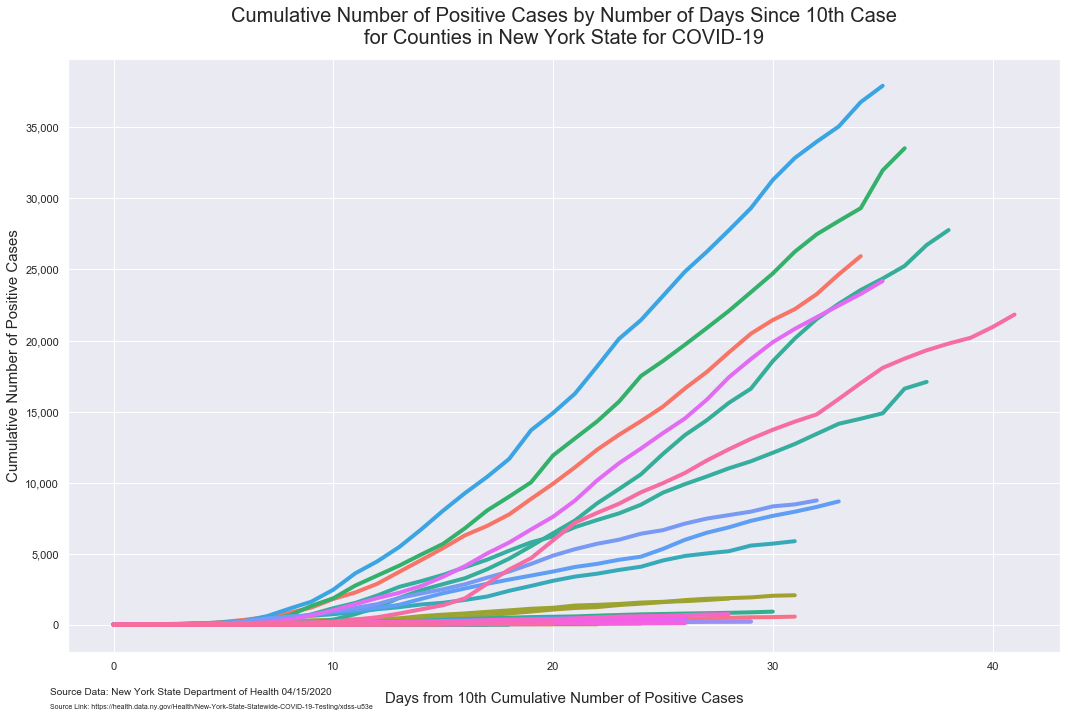

In [37]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

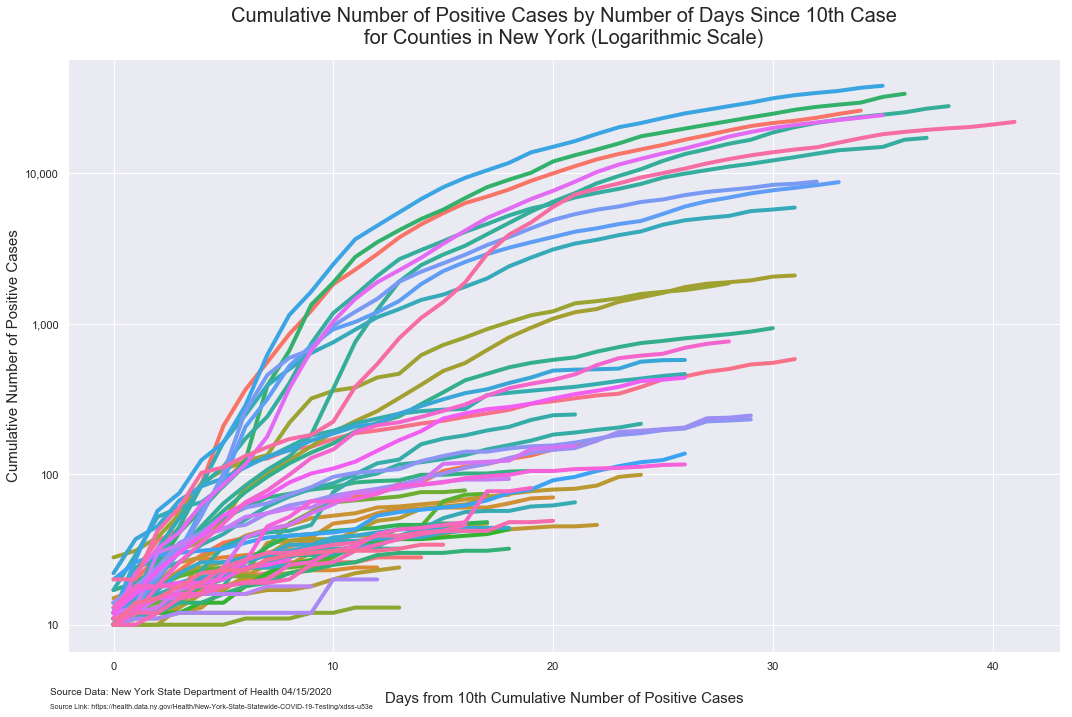

In [38]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [39]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

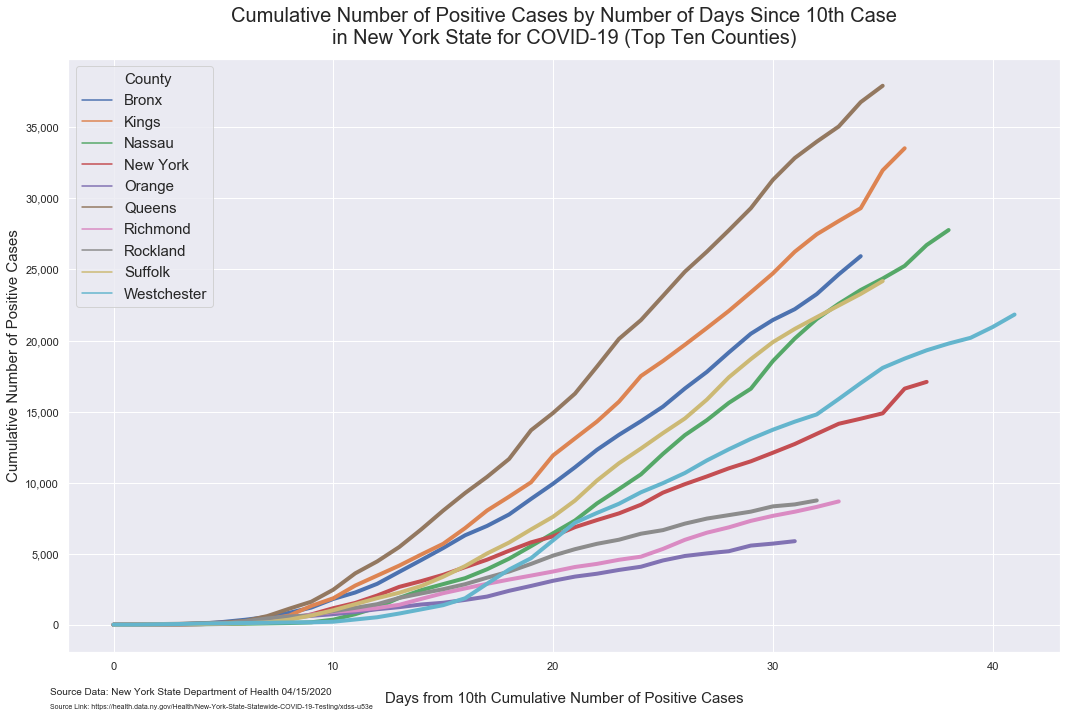

In [40]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

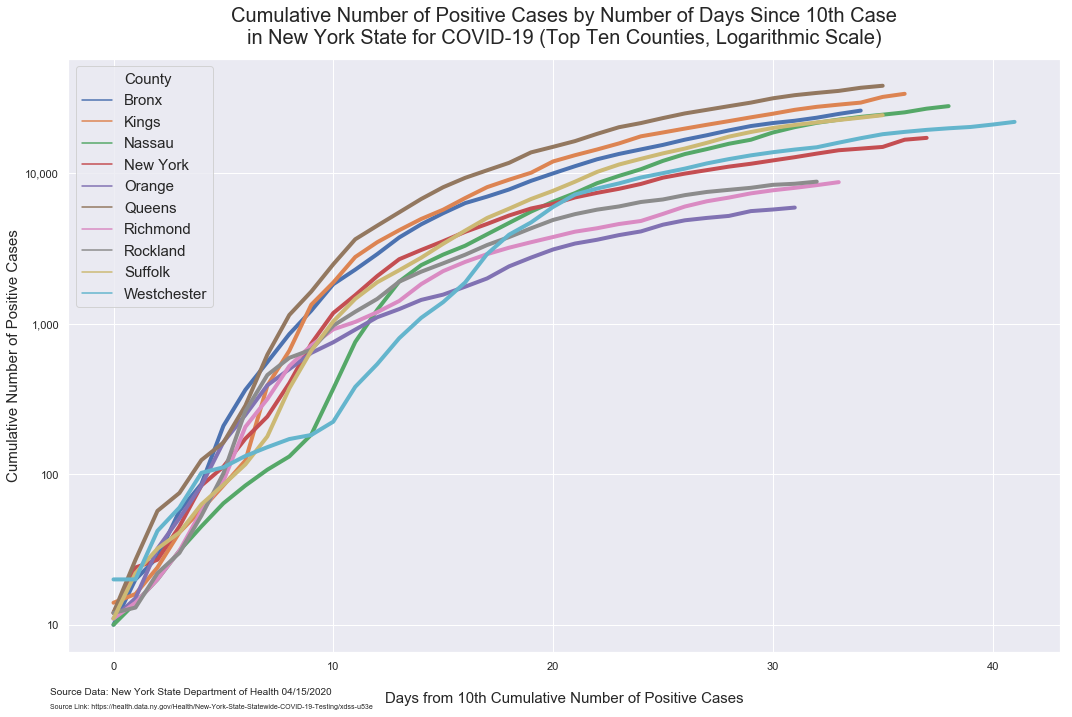

In [41]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

In [42]:
from_ten_cases_top_10.head()

Test Date County  New Positives  Cumulative Number of Positives  \
90 2020-04-15  Bronx           1279                           25932   
91 2020-04-14  Bronx           1387                           24653   
92 2020-04-13  Bronx           1061                           23266   
93 2020-04-12  Bronx            764                           22205   
94 2020-04-11  Bronx            964                           21441   

    Total Number of Tests Performed  Cumulative Number of Tests Performed  \
90                             2939                                 51053   
91                             2622                                 48114   
92                             2294                                 45492   
93                             1623                                 43198   
94                             2081                                 41575   

   ten_cases_date  days_from_10_cases  
90     2020-03-12                  34  
91     2020-03-12                  33  
92     2020-03-12                  32  
93     2020-03-12                  31  
94     2020-03-12                  30

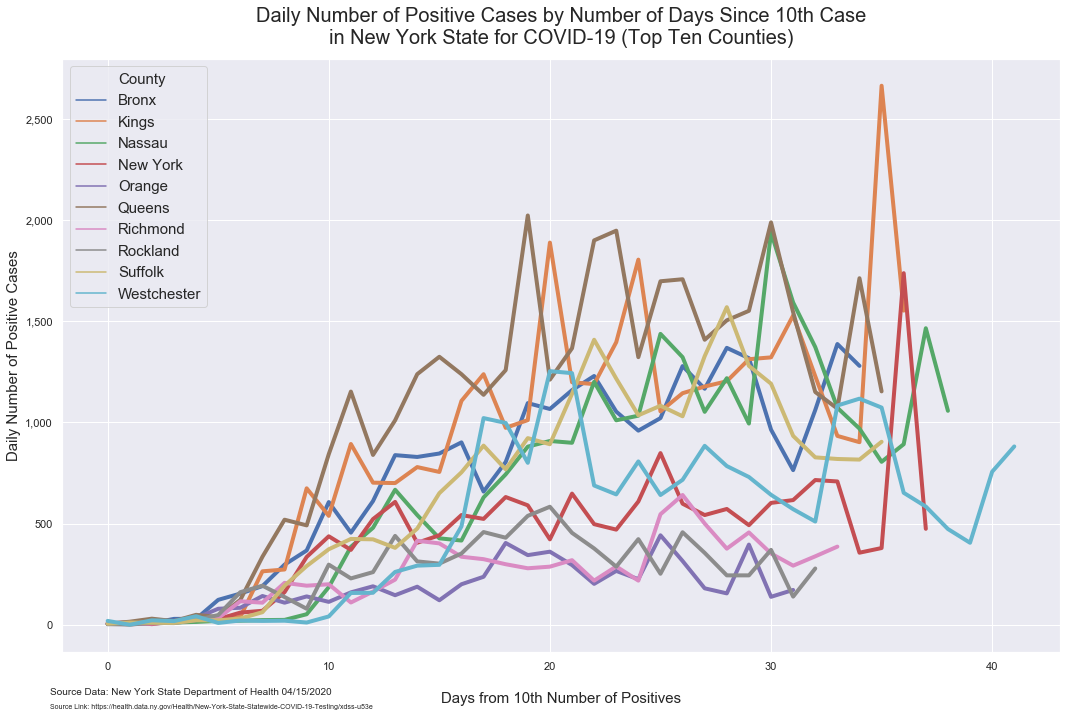

In [43]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [44]:
from_ten_cases_top_10['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0]

2560    0
Name: New Positives, dtype: int64

In [45]:
temp_fill_zeros = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0] = 1

temp_fill_zeros

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Test Date       County  New Positives  Cumulative Number of Positives  \
124  2020-03-12        Bronx              3                              10   
123  2020-03-13        Bronx             10                              20   
122  2020-03-14        Bronx              8                              28   
121  2020-03-15        Bronx             29                              57   
120  2020-03-16        Bronx             29                              86   
...         ...          ...            ...                             ...   
2524 2020-04-11  Westchester            584                           19313   
2523 2020-04-12  Westchester            473                           19786   
2522 2020-04-13  Westchester            405                           20191   
2521 2020-04-14  Westchester            756                           20947   
2520 2020-04-15  Westchester            881                           21828   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
124                                36                                   190   
123                                99                                   289   
122                                80                                   369   
121                               116                                   485   
120                               151                                   636   
...                               ...                                   ...   
2524                             1472                                 58299   
2523                             1163                                 59462   
2522                             1145                                 60607   
2521                             2019                                 62626   
2520                             2642                                 65268   

     ten_cases_date  days_from_10_cases  
124      2020-03-12                   0  
123      2020-03-12                   1  
122      2020-03-12                   2  
121      2020-03-12                   3  
120      2020-03-12                   4  
...             ...                 ...  
2524     2020-03-05                  37  
2523     2020-03-05                  38  
2522     2020-03-05                  39  
2521     2020-03-05                  40  
2520     2020-03-05                  41  

[362 rows x 8 columns]

In [46]:
temp_fill_zeros[['County', 'New Positives', 'days_from_10_cases']].loc[from_ten_cases_top_10['County'] == 'Westchester']

County  New Positives  days_from_10_cases
2561  Westchester             19                   0
2560  Westchester              1                   1
2559  Westchester             22                   2
2558  Westchester             18                   3
2557  Westchester             42                   4
2556  Westchester              9                   5
2555  Westchester             21                   6
2554  Westchester             19                   7
2553  Westchester             20                   8
2552  Westchester             11                   9
2551  Westchester             41                  10
2550  Westchester            157                  11
2549  Westchester            158                  12
2548  Westchester            261                  13
2547  Westchester            292                  14
2546  Westchester            296                  15
2545  Westchester            486                  16
2544  Westchester           1021                  17
2543  Westchester            997                  18
2542  Westchester            800                  19
2541  Westchester           1253                  20
2540  Westchester           1243                  21
2539  Westchester            688                  22
2538  Westchester            644                  23
2537  Westchester            807                  24
2536  Westchester            641                  25
2535  Westchester            716                  26
2534  Westchester            884                  27
2533  Westchester            784                  28
2532  Westchester            730                  29
2531  Westchester            642                  30
2530  Westchester            571                  31
2529  Westchester            510                  32
2528  Westchester           1083                  33
2527  Westchester           1117                  34
2526  Westchester           1073                  35
2525  Westchester            652                  36
2524  Westchester            584                  37
2523  Westchester            473                  38
2522  Westchester            405                  39
2521  Westchester            756                  40
2520  Westchester            881                  41

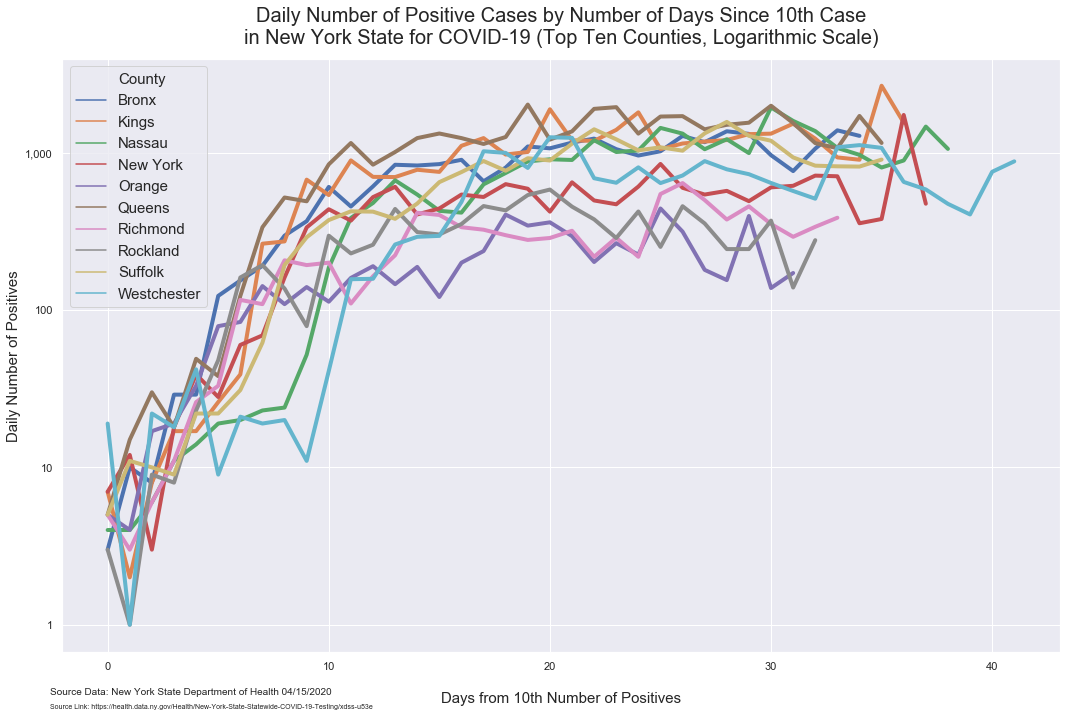

In [47]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [48]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                                ascending=[True, True, True])

In [49]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [50]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [51]:
from_ten_cases_top_10_weekly

County  Test Date  days_from_10_cases  New Positives Weekly Average
0         Bronx 2020-03-15                   3                     12.500000
1         Bronx 2020-03-22                  10                    252.428571
2         Bronx 2020-03-29                  17                    734.000000
3         Bronx 2020-04-05                  24                   1052.142857
4         Bronx 2020-04-12                  31                   1125.428571
..          ...        ...                 ...                           ...
57  Westchester 2020-03-22                  17                    381.571429
58  Westchester 2020-03-29                  24                    918.857143
59  Westchester 2020-04-05                  31                    709.714286
60  Westchester 2020-04-12                  38                    784.571429
61  Westchester 2020-04-19                  41                    680.666667

[62 rows x 4 columns]

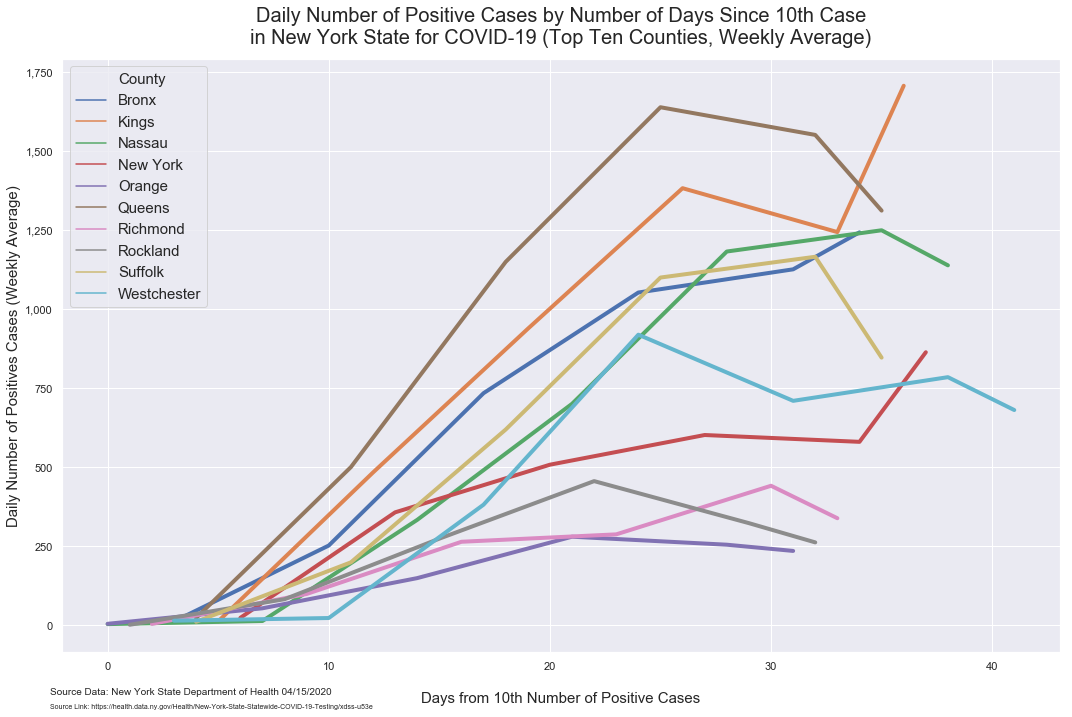

In [52]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positives Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

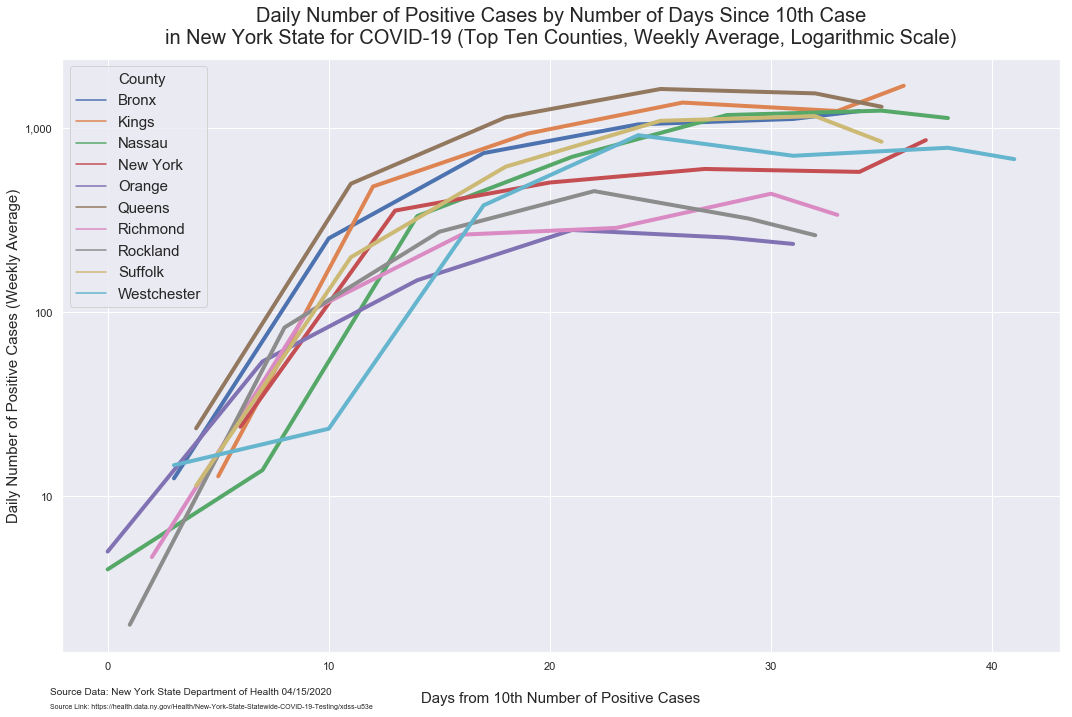

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

# Trajectory Plots

In [54]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-15       Albany             33                             581   
1 2020-04-15     Allegany              0                              28   
2 2020-04-15        Bronx           1279                           25932   
3 2020-04-15       Broome             14                             167   
4 2020-04-15  Cattaraugus              0                              32   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              301                                  6163  
1                                8                                   312  
2                             2939                                 51053  
3                               74                                  1185  
4                               14                                   408

In [55]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [56]:
nys_trajectory['daily_cases'] = nys_trajectory['Cumulative Number of Positives'].diff()

In [57]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          NaN
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [58]:
nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases < 0] = nys_trajectory['Cumulative Number of Positives']

nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases.isnull()] = nys_trajectory['Cumulative Number of Positives']

In [59]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          1.0
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [60]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'daily_cases': np.mean})

In [61]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

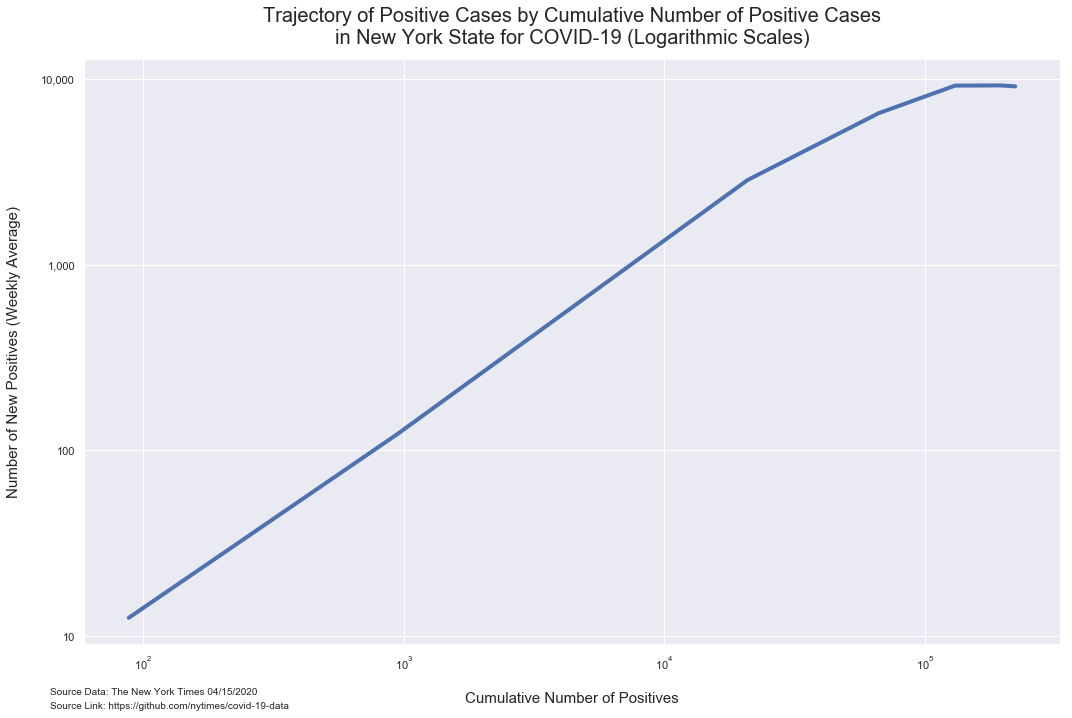

In [62]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [63]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [64]:
trajectory_plot.head()

Test Date  County  New Positives  Cumulative Number of Positives  \
2728 2020-03-02  Albany              0                               0   
2666 2020-03-03  Albany              0                               0   
2604 2020-03-04  Albany              0                               0   
2542 2020-03-05  Albany              0                               0   
2480 2020-03-06  Albany              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
2728                                0                                     0  
2666                                0                                     0  
2604                                0                                     0  
2542                                3                                     3  
2480                                0                                     3

In [65]:
trajectory_plot = trajectory_plot.loc[trajectory_plot['Cumulative Number of Positives'] > 0]

In [66]:
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                     'New Positives': np.mean})


In [67]:
trajectory_plot[:50]

Cumulative Number of Positives  New Positives
County      Test Date                                                
Albany      2020-03-15                              12       3.000000
            2020-03-22                             127      16.428571
            2020-03-29                             217      12.857143
            2020-04-05                             319      14.571429
            2020-04-12                             499      25.714286
            2020-04-19                             581      27.333333
Allegany    2020-03-15                               2       2.000000
            2020-03-22                               2       0.000000
            2020-03-29                               7       0.714286
            2020-04-05                              17       1.428571
            2020-04-12                              26       1.285714
            2020-04-19                              28       0.666667
Bronx       2020-03-08                               1       1.000000
            2020-03-15                              57       8.000000
            2020-03-22                            1824     252.428571
            2020-03-29                            6962     734.000000
            2020-04-05                           14327    1052.142857
            2020-04-12                           22205    1125.428571
            2020-04-19                           25932    1242.333333
Broome      2020-03-15                               1       0.250000
            2020-03-22                               7       0.857143
            2020-03-29                              35       4.000000
            2020-04-05                              76       5.857143
            2020-04-12                             133       8.142857
            2020-04-19                             167      11.333333
Cattaraugus 2020-03-29                               6       2.000000
            2020-04-05                              12       0.857143
            2020-04-12                              28       2.285714
            2020-04-19                              32       1.333333
Cayuga      2020-03-22                               2       2.000000
            2020-03-29                               3       0.142857
            2020-04-05                              11       1.142857
            2020-04-12                              30       2.714286
            2020-04-19                              36       2.000000
Chautauqua  2020-03-29                               5       0.833333
            2020-04-05                              15       1.428571
            2020-04-12                              23       1.142857
            2020-04-19                              24       0.333333
Chemung     2020-03-29                              15       2.142857
            2020-04-05                              47       4.571429
            2020-04-12                              60       1.857143
            2020-04-19                              70       3.333333
Chenango    2020-03-22                               3       0.500000
            2020-03-29                              17       2.000000
            2020-04-05                              46       4.142857
            2020-04-12                              65       2.714286
            2020-04-19                              73       2.666667
Clinton     2020-03-22                               6       0.857143
            2020-03-29                              17       1.571429
            2020-04-05                              36       2.714286

In [68]:
trajectory_plot.reset_index(inplace=True)

trajectory_plot.rename(columns={'New Positives': 'daily_cases_week_avg'}, inplace=True)

In [69]:
trajectory_plot.head()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
0  Albany 2020-03-15                              12              3.000000
1  Albany 2020-03-22                             127             16.428571
2  Albany 2020-03-29                             217             12.857143
3  Albany 2020-04-05                             319             14.571429
4  Albany 2020-04-12                             499             25.714286

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


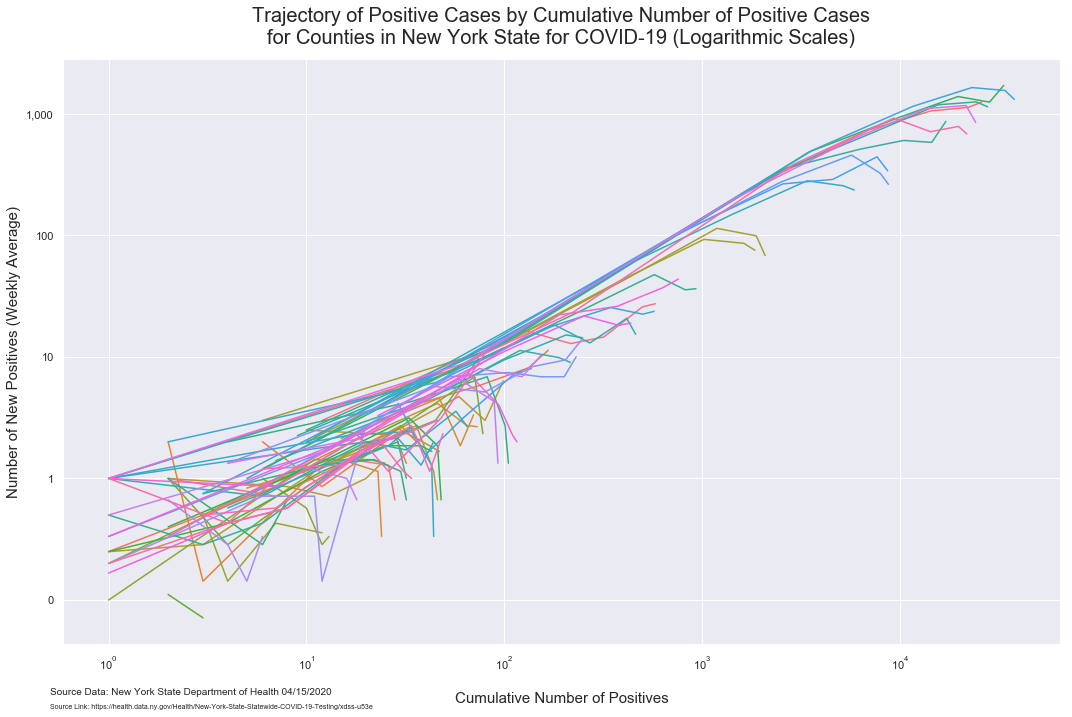

In [70]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot, ci=False)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [71]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [72]:
trajectory_plot_scatter.tail()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
57     Essex 2020-04-19                              12              0.000000
58     Lewis 2020-04-19                               8              0.666667
59     Yates 2020-04-19                               7              1.000000
60  Schuyler 2020-04-19                               6              0.333333
61  Hamilton 2020-04-19                               3              0.000000

In [73]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Nassau', 'Bronx', 'Suffolk', 'Westchester', 'New York', 'Rockland', 'Richmond', 'Orange', 'Dutchess', 'Erie', 'Monroe', 'Ulster', 'Albany', 'Putnam', 'Onondaga', 'Sullivan', 'Oneida', 'Schenectady', 'Saratoga', 'Niagara', 'Broome', 'Steuben', 'Rensselaer', 'Tompkins', 'Madison', 'Columbia', 'St. Lawrence', 'Warren', 'Genesee', 'Greene', 'Chenango', 'Chemung', 'Ontario', 'Wayne', 'Jefferson', 'Delaware', 'Clinton', 'Washington', 'Oswego', 'Otsego', 'Herkimer', 'Cayuga', 'Orleans', 'Wyoming', 'Cattaraugus', 'Livingston', 'Montgomery', 'Allegany', 'Tioga', 'Fulton', 'Chautauqua', 'Cortland', 'Schoharie', 'Seneca', 'Franklin', 'Essex', 'Lewis', 'Yates', 'Schuyler', 'Hamilton']


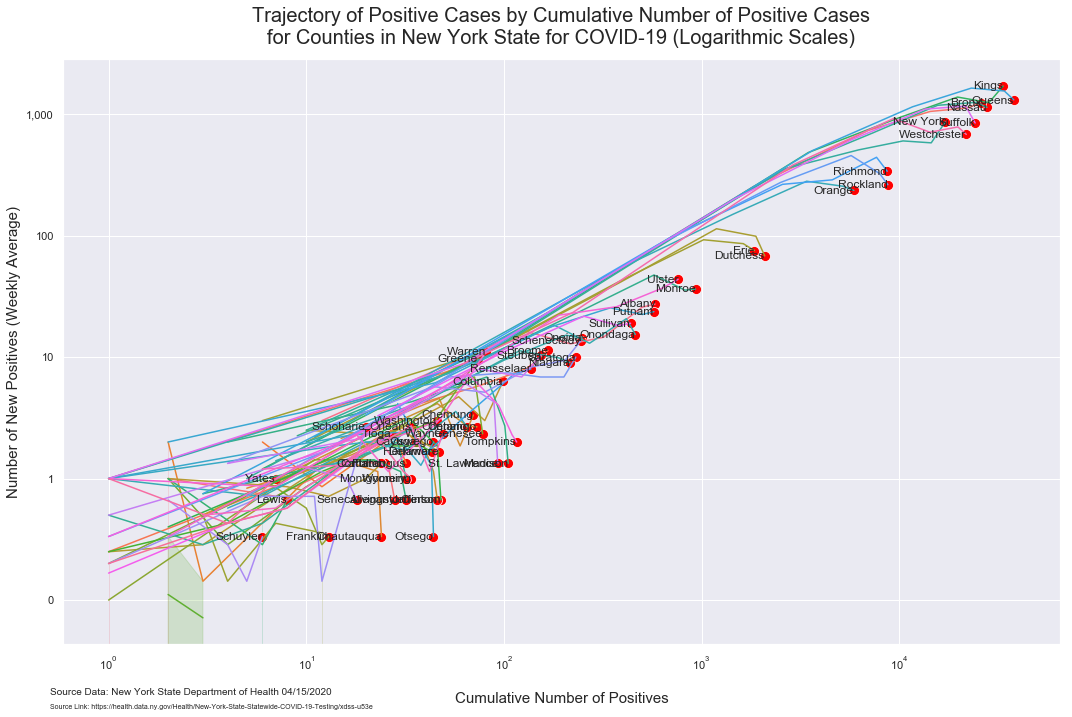

In [74]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
#plt.savefig('figures/trajectory-nys-county-log-log-scatter')

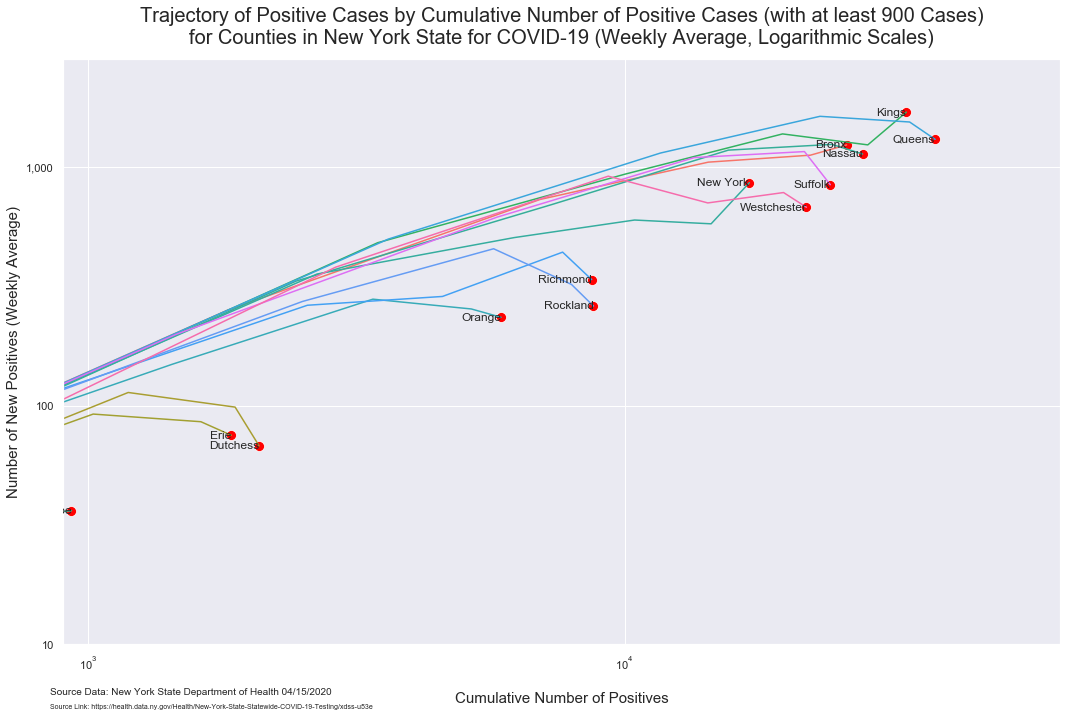

In [75]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases (with at least 900 Cases)\nfor Counties in New York State for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter-x-limit')

In [76]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

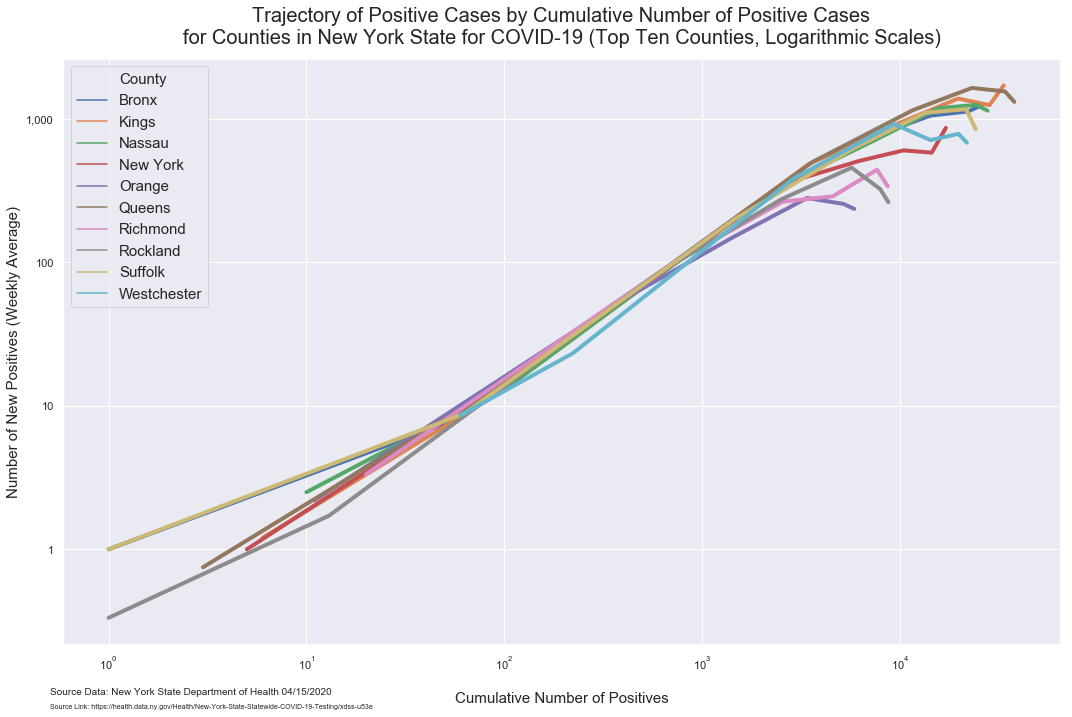

In [77]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [78]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [79]:
covid_19_nys_data_total.head(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-03-02 2020-03-02                               1
2020-03-03 2020-03-03                               1
2020-03-04 2020-03-04                               3
2020-03-05 2020-03-05                              25
2020-03-06 2020-03-06                              36
2020-03-07 2020-03-07                              60
2020-03-08 2020-03-08                              88
2020-03-09 2020-03-09                             151
2020-03-10 2020-03-10                             195
2020-03-11 2020-03-11                             251

In [80]:
covid_19_nys_data_total.tail(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-04-06 2020-04-06                          138863
2020-04-07 2020-04-07                          149316
2020-04-08 2020-04-08                          159937
2020-04-09 2020-04-09                          170512
2020-04-10 2020-04-10                          180458
2020-04-11 2020-04-11                          188694
2020-04-12 2020-04-12                          195031
2020-04-13 2020-04-13                          202208
2020-04-14 2020-04-14                          213779
2020-04-15 2020-04-15                          222284

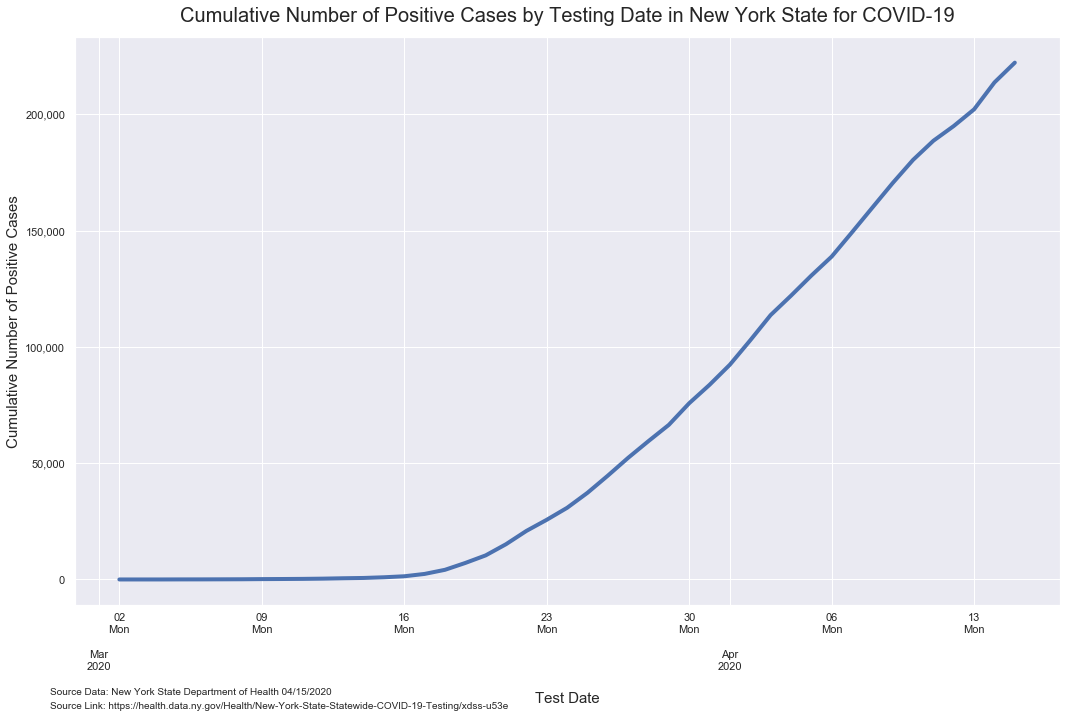

In [81]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

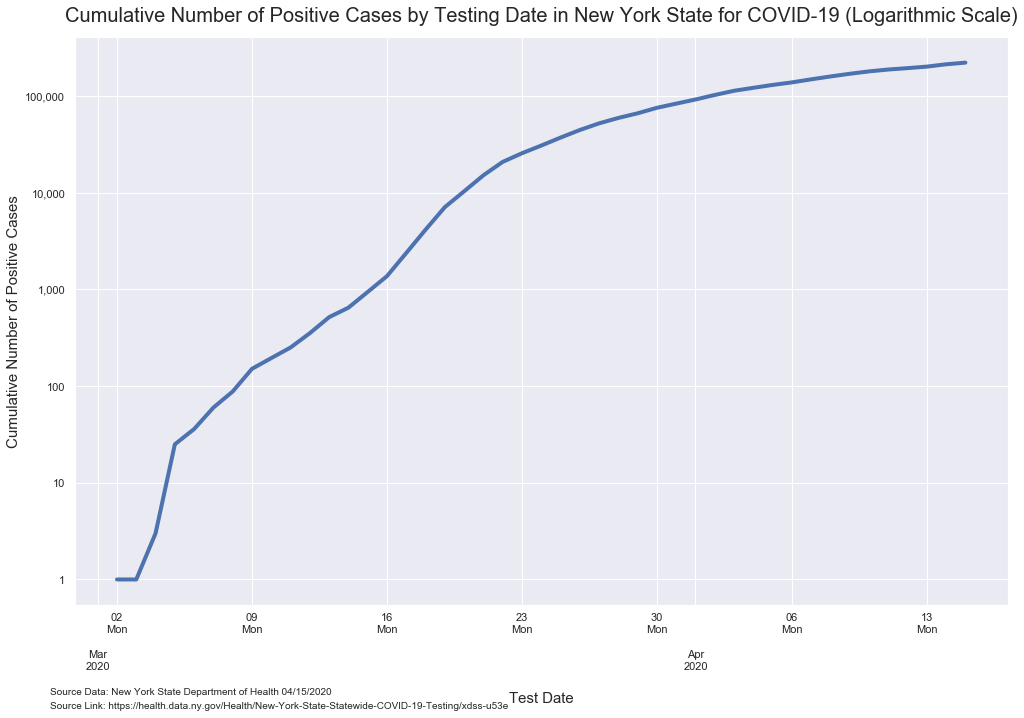

In [82]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

# Bar Plots

In [83]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [84]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

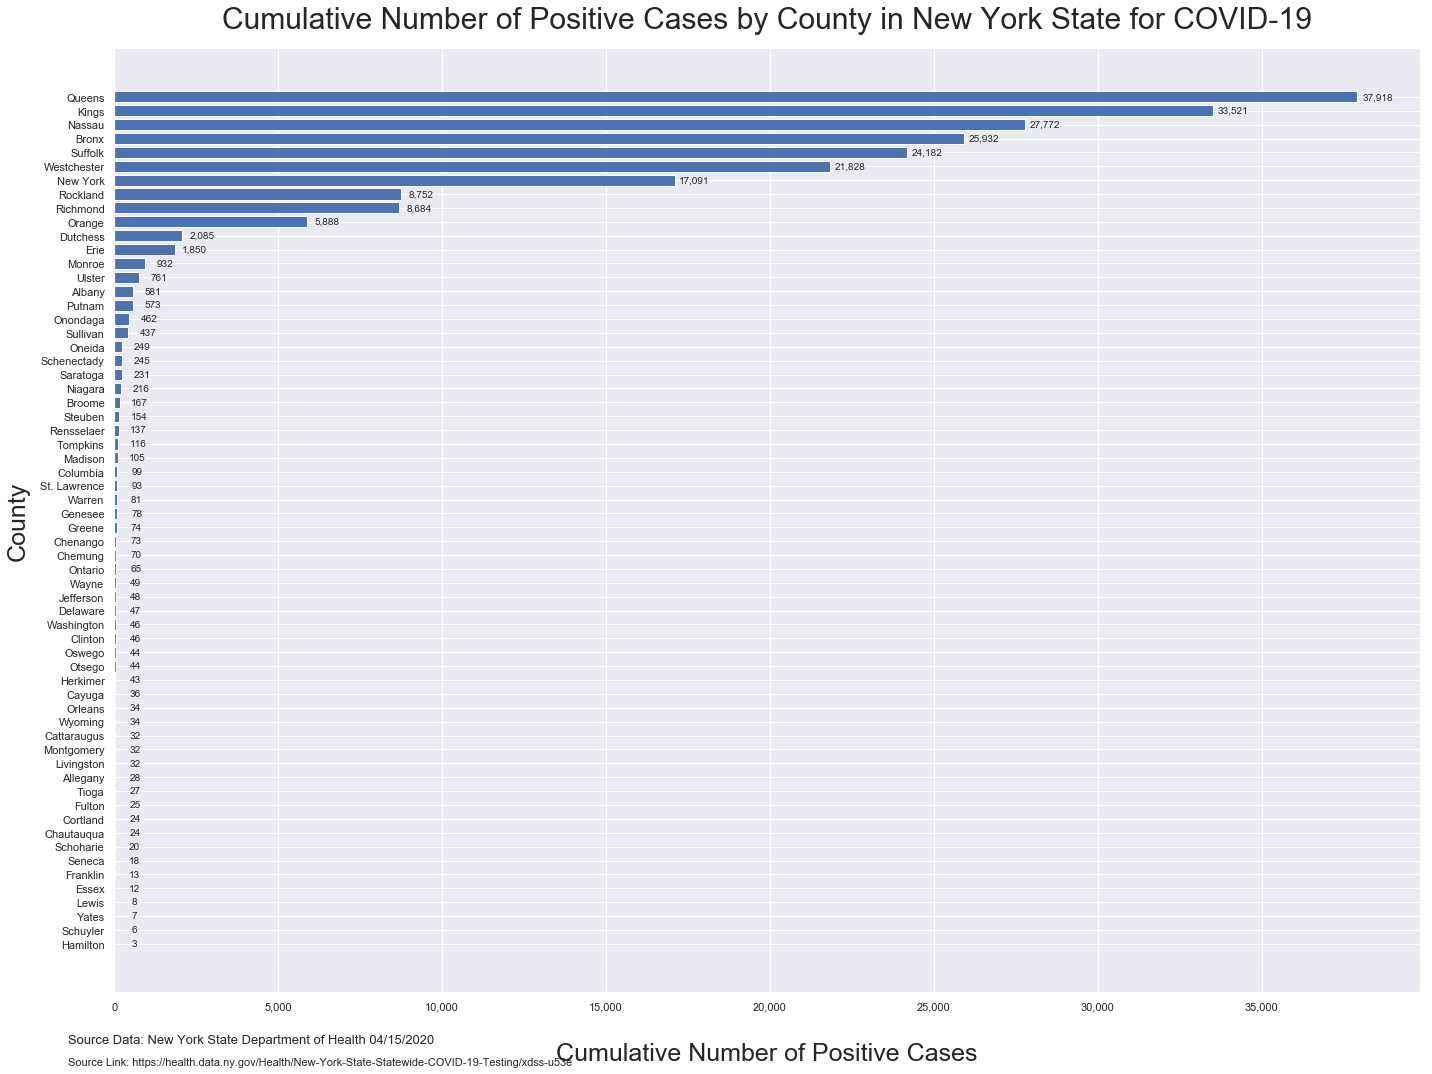

In [85]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positive Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positive Cases by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [86]:
from_ten_cases_top_10

Test Date       County  New Positives  Cumulative Number of Positives  \
90   2020-04-15        Bronx           1279                           25932   
91   2020-04-14        Bronx           1387                           24653   
92   2020-04-13        Bronx           1061                           23266   
93   2020-04-12        Bronx            764                           22205   
94   2020-04-11        Bronx            964                           21441   
...         ...          ...            ...                             ...   
2557 2020-03-09  Westchester             42                             102   
2558 2020-03-08  Westchester             18                              60   
2559 2020-03-07  Westchester             22                              42   
2560 2020-03-06  Westchester              0                              20   
2561 2020-03-05  Westchester             19                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
90                               2939                                 51053   
91                               2622                                 48114   
92                               2294                                 45492   
93                               1623                                 43198   
94                               2081                                 41575   
...                               ...                                   ...   
2557                              222                                   592   
2558                              207                                   370   
2559                              110                                   163   
2560                                9                                    53   
2561                               42                                    44   

     ten_cases_date  days_from_10_cases  
90       2020-03-12                  34  
91       2020-03-12                  33  
92       2020-03-12                  32  
93       2020-03-12                  31  
94       2020-03-12                  30  
...             ...                 ...  
2557     2020-03-05                   4  
2558     2020-03-05                   3  
2559     2020-03-05                   2  
2560     2020-03-05                   1  
2561     2020-03-05                   0  

[362 rows x 8 columns]

In [87]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [88]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [89]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
124 2020-03-12  Bronx              3                              10   
123 2020-03-13  Bronx             10                              20   
122 2020-03-14  Bronx              8                              28   
121 2020-03-15  Bronx             29                              57   
120 2020-03-16  Bronx             29                              86   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
124                               36                                   190   
123                               99                                   289   
122                               80                                   369   
121                              116                                   485   
120                              151                                   636   

    ten_cases_date  days_from_10_cases  growth_rate  
124     2020-03-12                   0          NaN  
123     2020-03-12                   1     3.333333  
122     2020-03-12                   2     0.800000  
121     2020-03-12                   3     3.625000  
120     2020-03-12                   4     1.000000

In [90]:
growth_rate = growth_rate.loc[growth_rate.days_from_10_cases != 0]

In [91]:
growth_rate.sort_values(by='growth_rate')

Test Date       County  New Positives  Cumulative Number of Positives  \
2560 2020-03-06  Westchester              0                              20   
2556 2020-03-10  Westchester              9                             111   
1295 2020-03-11     New York              3                              27   
1260 2020-04-15     New York            474                           17091   
1025 2020-03-11        Kings              2                              16   
...         ...          ...            ...                             ...   
1261 2020-04-14     New York           1737                           16617   
1294 2020-03-12     New York             18                              45   
1019 2020-03-17        Kings            264                             387   
1875 2020-03-16     Rockland              9                              22   
2559 2020-03-07  Westchester             22                              42   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
2560                                9                                    53   
2556                              177                                   769   
1295                               70                                   280   
1260                             1533                                 42050   
1025                               24                                   128   
...                               ...                                   ...   
1261                             4068                                 40517   
1294                              186                                   466   
1019                              741                                  1500   
1875                               39                                   122   
2559                              110                                   163   

     ten_cases_date  days_from_10_cases  growth_rate  
2560     2020-03-05                   1     0.000000  
2556     2020-03-05                   5     0.214286  
1295     2020-03-09                   2     0.250000  
1260     2020-03-09                  37     0.272884  
1025     2020-03-10                   1     0.285714  
...             ...                 ...          ...  
1261     2020-03-09                  36     4.583113  
1294     2020-03-09                   3     6.000000  
1019     2020-03-10                   7     6.769231  
1875     2020-03-14                   2     9.000000  
2559     2020-03-05                   2          inf  

[352 rows x 9 columns]

In [92]:
growth_rate.sort_values(by='growth_rate', ascending=False)

Test Date       County  New Positives  Cumulative Number of Positives  \
2559 2020-03-07  Westchester             22                              42   
1875 2020-03-16     Rockland              9                              22   
1019 2020-03-17        Kings            264                             387   
1294 2020-03-12     New York             18                              45   
1261 2020-04-14     New York           1737                           16617   
...         ...          ...            ...                             ...   
1025 2020-03-11        Kings              2                              16   
1260 2020-04-15     New York            474                           17091   
1295 2020-03-11     New York              3                              27   
2556 2020-03-10  Westchester              9                             111   
2560 2020-03-06  Westchester              0                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
2559                              110                                   163   
1875                               39                                   122   
1019                              741                                  1500   
1294                              186                                   466   
1261                             4068                                 40517   
...                               ...                                   ...   
1025                               24                                   128   
1260                             1533                                 42050   
1295                               70                                   280   
2556                              177                                   769   
2560                                9                                    53   

     ten_cases_date  days_from_10_cases  growth_rate  
2559     2020-03-05                   2          inf  
1875     2020-03-14                   2     9.000000  
1019     2020-03-10                   7     6.769231  
1294     2020-03-09                   3     6.000000  
1261     2020-03-09                  36     4.583113  
...             ...                 ...          ...  
1025     2020-03-10                   1     0.285714  
1260     2020-03-09                  37     0.272884  
1295     2020-03-09                   2     0.250000  
2556     2020-03-05                   5     0.214286  
2560     2020-03-05                   1     0.000000  

[352 rows x 9 columns]

In [93]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [94]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [95]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [96]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
123 2020-03-13  Bronx             10                              20   
122 2020-03-14  Bronx              8                              28   
121 2020-03-15  Bronx             29                              57   
120 2020-03-16  Bronx             29                              86   
119 2020-03-17  Bronx            123                             209   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
123                               99                                   289   
122                               80                                   369   
121                              116                                   485   
120                              151                                   636   
119                              433                                  1069   

    ten_cases_date  days_from_10_cases  growth_rate  
123     2020-03-12                   1     3.333333  
122     2020-03-12                   2     0.800000  
121     2020-03-12                   3     3.625000  
120     2020-03-12                   4     1.000000  
119     2020-03-12                   5     4.241379

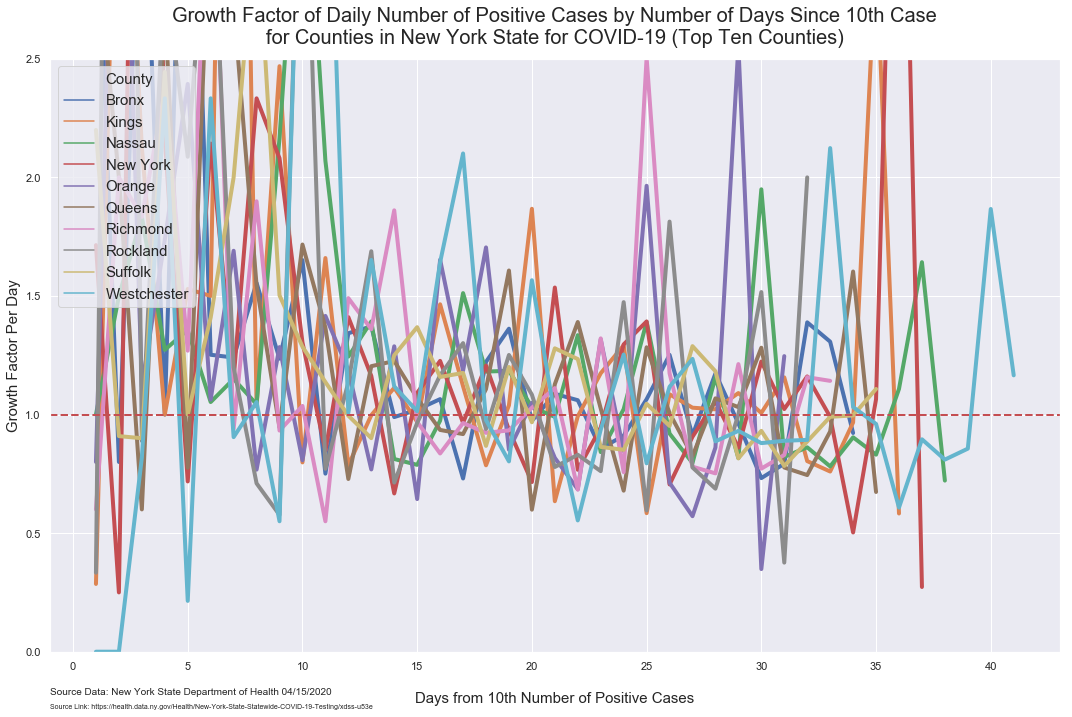

In [97]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2.5)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [98]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [99]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
            2020-04-12                  31     0.984170
            2020-04-19                  34     1.206045
Kings       2020-03-15                   5     1.788025
            2020-03-22                  12     2.145196
            2020-03-29                  19     1.069778
            2020-04-05                  26     1.090069
            2020-04-12                  33     0.981220
            2020-04-19                  36     1.500634
Nassau      2020-03-15                   7     1.309405
            2020-03-22                  14     1.758028
            2020-03-29                  21     1.094516
            2020-04-05                  28     1.066269
            2020-04-12                  35     0.995011
            2020-04-19                  38     1.157318
New York    2020-03-15                   6     2.165293
            2020-03-22                  13     1.469841
            2020-03-29                  20     0.972363
            2020-04-05                  27     1.078276
            2020-04-12                  34     0.973725
            2020-04-19                  37     1.973535
Orange      2020-03-22                   7     1.864599
            2020-03-29                  14     1.074096
            2020-04-05                  21     1.129176
            2020-04-12                  28     0.993871
            2020-04-19                  31     1.383233
Queens      2020-03-15                   4     2.080556
            2020-03-22                  11     1.759744
            2020-03-29                  18     1.026767
            2020-04-05                  25     1.101763
            2020-04-12                  32     0.961914
            2020-04-19                  35     1.068391
Richmond    2020-03-15                   2     1.300000
            2020-03-22                   9     1.821780
            2020-03-29                  16     1.157488
            2020-04-05                  23     0.994985
            2020-04-12                  30     1.136036
            2020-04-19                  33     1.043031
Rockland    2020-03-15                   1     0.333333
            2020-03-22                   8     2.873373
            2020-03-29                  15     1.372693
            2020-04-05                  22     1.049928
            2020-04-12                  29     1.015501
            2020-04-19                  32     1.297356
Suffolk     2020-03-15                   4     1.613384
            2020-03-22                  11     1.635360
            2020-03-29                  18     1.102248
            2020-04-05                  25     1.063048
            2020-04-12                  32     0.976969
            2020-04-19                  35     1.031502
Westchester 2020-03-08                   3     0.272727
            2020-03-15                  10     1.587946
            2020-03-22                  17     1.766103
            2020-03-29                  24     1.011403
            2020-04-05                  31     0.961829
            2020-04-12                  38     1.045997
            2020-04-19                  41     1.296082

In [100]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [101]:
growth_rate_weekly

County  Test Date  days_from_10_cases  growth_rate_weekly_average
0         Bronx 2020-03-15                   3                    2.586111
1         Bronx 2020-03-22                  10                    1.739366
2         Bronx 2020-03-29                  17                    1.038612
3         Bronx 2020-04-05                  24                    1.067501
4         Bronx 2020-04-12                  31                    0.984170
5         Bronx 2020-04-19                  34                    1.206045
6         Kings 2020-03-15                   5                    1.788025
7         Kings 2020-03-22                  12                    2.145196
8         Kings 2020-03-29                  19                    1.069778
9         Kings 2020-04-05                  26                    1.090069
10        Kings 2020-04-12                  33                    0.981220
11        Kings 2020-04-19                  36                    1.500634
12       Nassau 2020-03-15                   7                    1.309405
13       Nassau 2020-03-22                  14                    1.758028
14       Nassau 2020-03-29                  21                    1.094516
15       Nassau 2020-04-05                  28                    1.066269
16       Nassau 2020-04-12                  35                    0.995011
17       Nassau 2020-04-19                  38                    1.157318
18     New York 2020-03-15                   6                    2.165293
19     New York 2020-03-22                  13                    1.469841
20     New York 2020-03-29                  20                    0.972363
21     New York 2020-04-05                  27                    1.078276
22     New York 2020-04-12                  34                    0.973725
23     New York 2020-04-19                  37                    1.973535
24       Orange 2020-03-22                   7                    1.864599
25       Orange 2020-03-29                  14                    1.074096
26       Orange 2020-04-05                  21                    1.129176
27       Orange 2020-04-12                  28                    0.993871
28       Orange 2020-04-19                  31                    1.383233
29       Queens 2020-03-15                   4                    2.080556
30       Queens 2020-03-22                  11                    1.759744
31       Queens 2020-03-29                  18                    1.026767
32       Queens 2020-04-05                  25                    1.101763
33       Queens 2020-04-12                  32                    0.961914
34       Queens 2020-04-19                  35                    1.068391
35     Richmond 2020-03-15                   2                    1.300000
36     Richmond 2020-03-22                   9                    1.821780
37     Richmond 2020-03-29                  16                    1.157488
38     Richmond 2020-04-05                  23                    0.994985
39     Richmond 2020-04-12                  30                    1.136036
40     Richmond 2020-04-19                  33                    1.043031
41     Rockland 2020-03-15                   1                    0.333333
42     Rockland 2020-03-22                   8                    2.873373
43     Rockland 2020-03-29                  15                    1.372693
44     Rockland 2020-04-05                  22                    1.049928
45     Rockland 2020-04-12                  29                    1.015501
46     Rockland 2020-04-19                  32                    1.297356
47      Suffolk 2020-03-15                   4                    1.613384
48      Suffolk 2020-03-22                  11                    1.635360
49      Suffolk 2020-03-29                  18                    1.102248
50      Suffolk 2020-04-05                  25                    1.063048
51      Suffolk 2020-04-12                  32                    0.976969
52      Suffolk 2020-04-19        

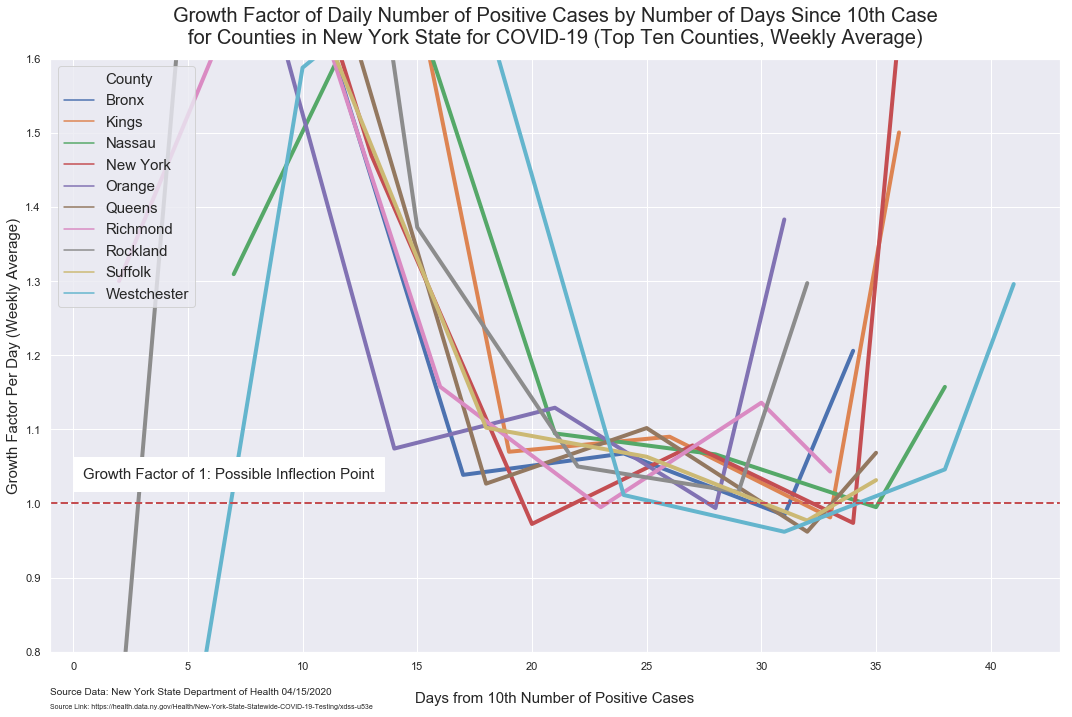

In [102]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')


sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.6)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.08, 0.33, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')

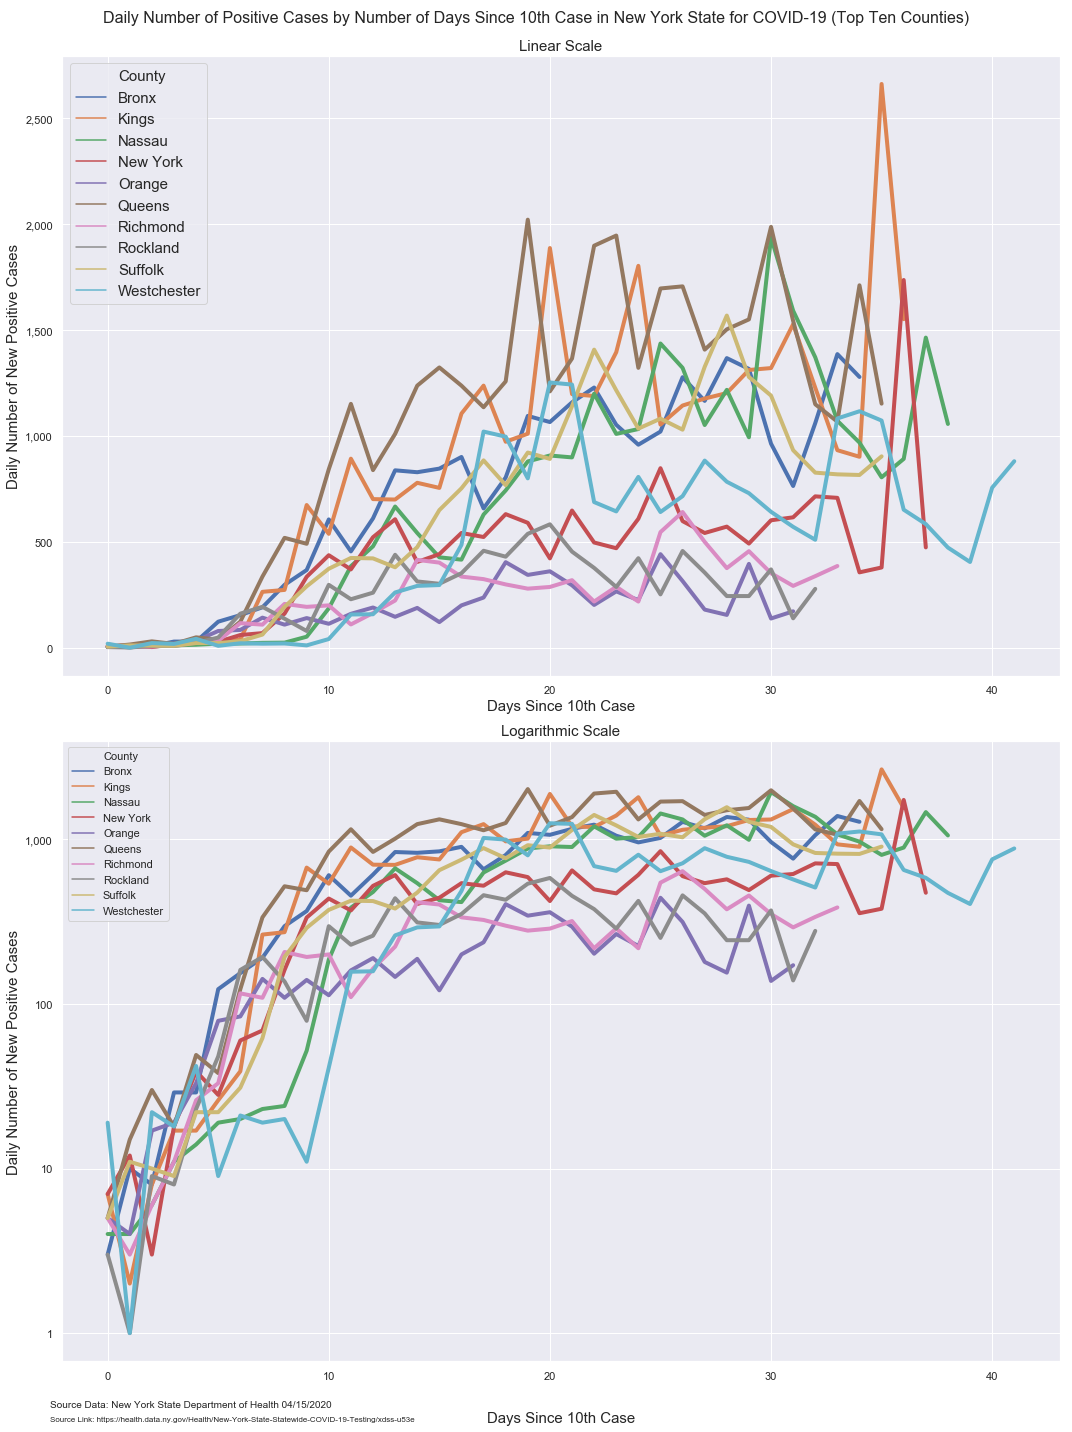

In [103]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 1
ax1 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.legend(loc='upper left', fontsize=15)


# Plot 2

ax2 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax2.set_yscale('log')

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=15)
ax2.set_title('Logarithmic Scale', fontsize=15)

# Setting Labels
ax1.set_xlabel('Days Since 10th Case', fontsize=15)
ax2.set_xlabel('Days Since 10th Case', fontsize=15, labelpad = 20)
ax1.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax2.set_ylabel('Daily Number of New Positive Cases', fontsize=15)

ax2.xaxis.labelpad = 30

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot1')

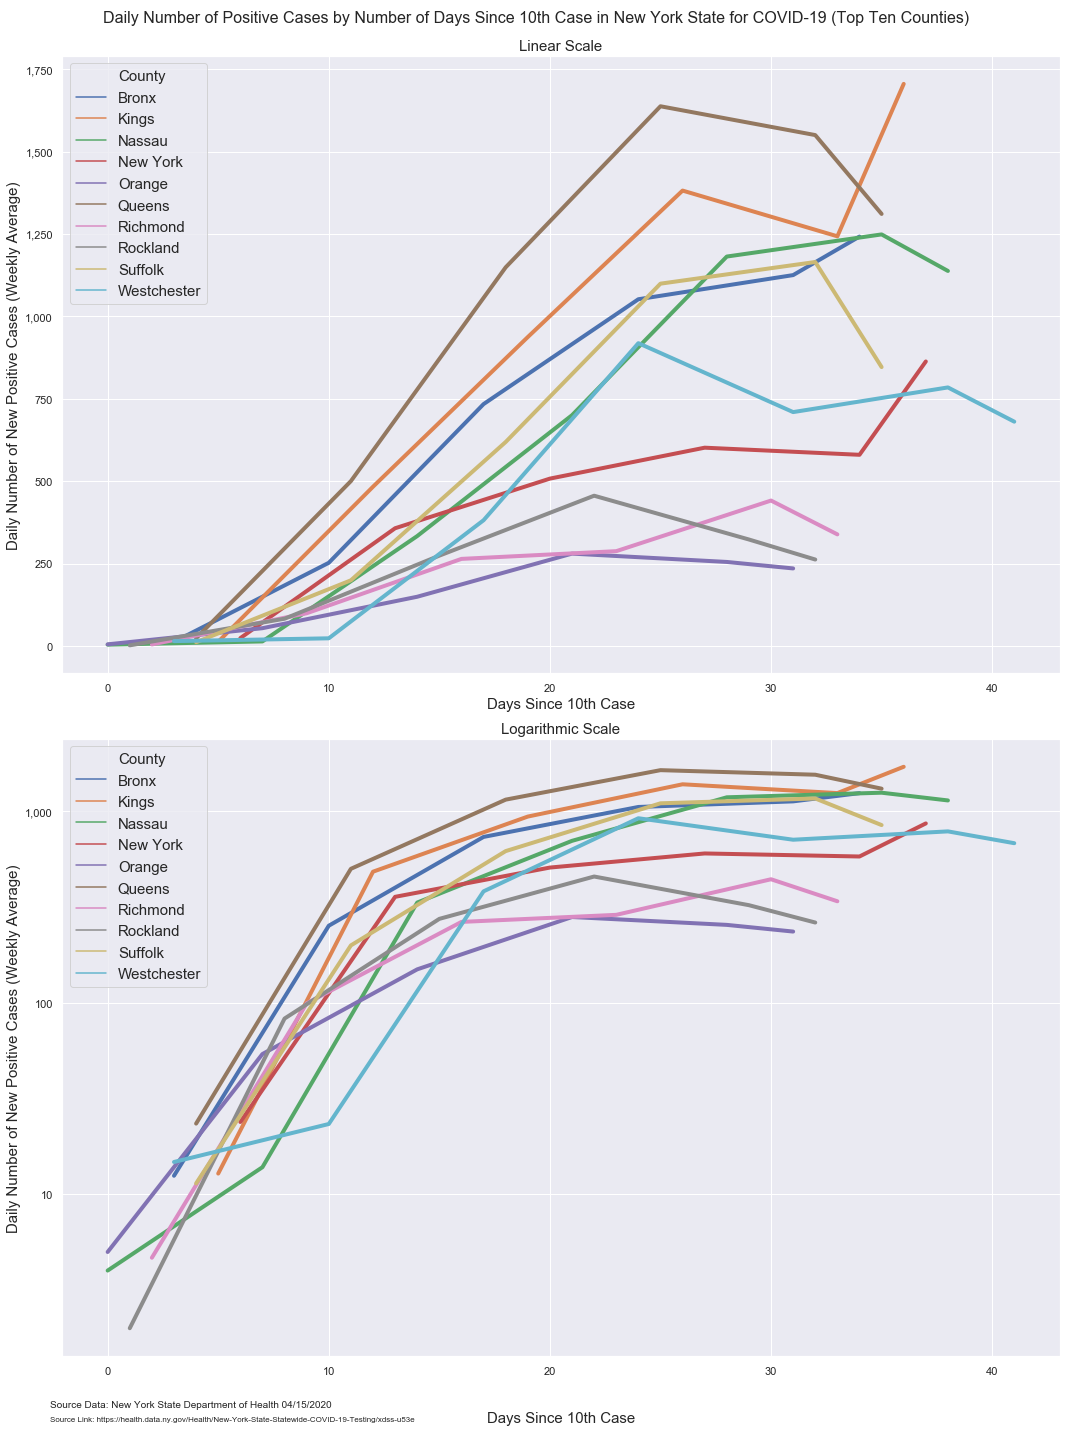

In [104]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.legend(loc='upper left', fontsize=15)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax4.set_yscale('log')

ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.legend(loc='upper left', fontsize=15)

# Setting Labels
ax3.set_xlabel('Days Since 10th Case', fontsize=15)
ax4.set_xlabel('Days Since 10th Case', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)


# Setting Titles
ax3.set_title('\n\nLinear Scale', fontsize=15)
ax4.set_title('Logarithmic Scale', fontsize=15)

ax4.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot2')

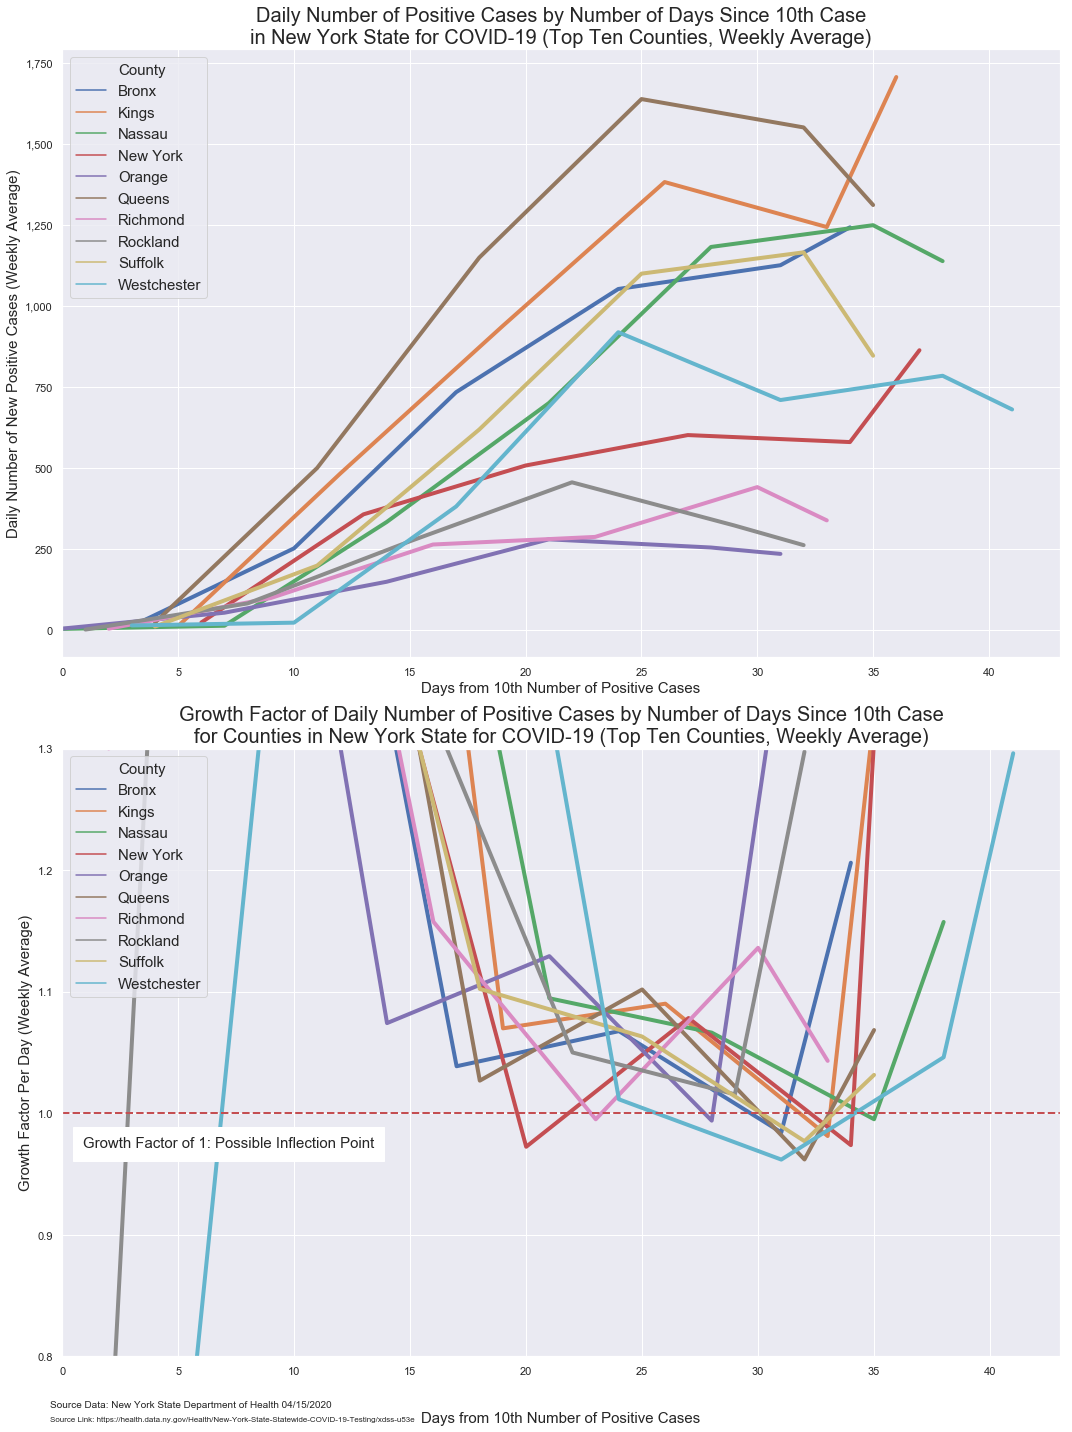

In [105]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.legend(loc='upper left', fontsize=15)
plt.xlim(0)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax4.axhline(1, color='r', lw=2, linestyle='dashed')
ax4.legend(loc='upper left', fontsize=15)
ax4.xaxis.labelpad = 20
plt.ylim(0.8, 1.3)
plt.xlim(0)

# Setting Labels
ax3.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax4.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
ax4.xaxis.labelpad = 35


# Setting Titles
ax3.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)
ax4.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot3')

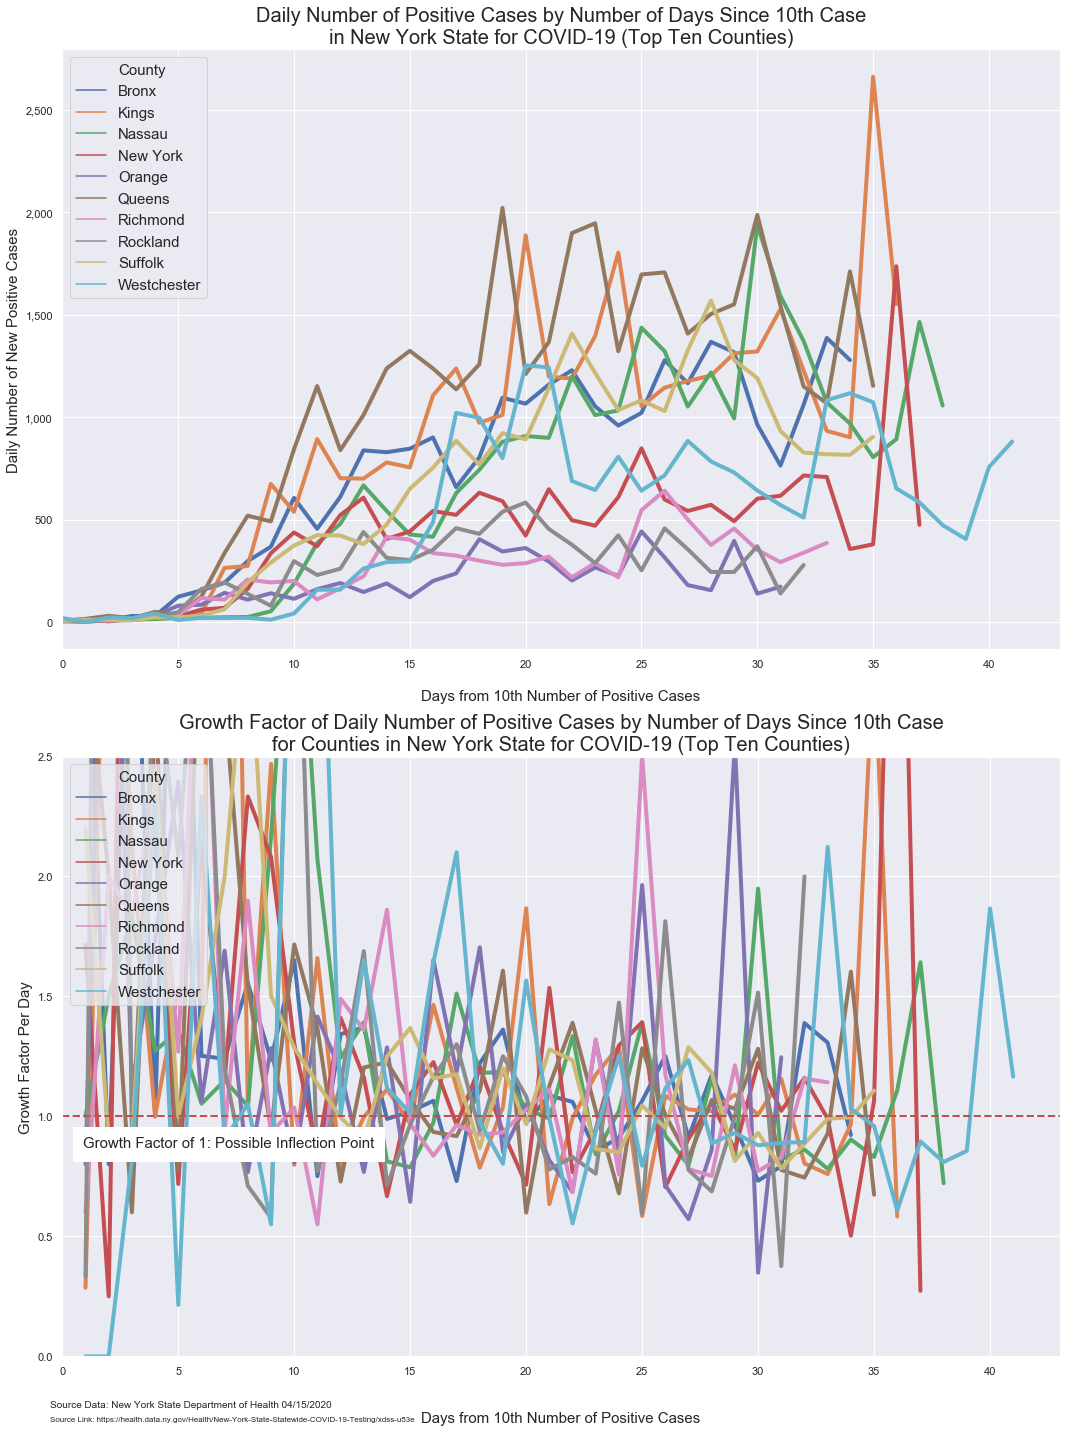

In [106]:
fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax0 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax0.xaxis.labelpad = 20
ax0.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# # Plot 4
ax1 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')
ax1.xaxis.labelpad = 20
plt.ylim(0, 2.5)
ax1.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# Setting Labels
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)


# Setting Titles
ax0.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)
ax1.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)

ax1.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))


plt.tight_layout()
plt.savefig('figures/daily_cases_subplot4')